In [1]:
#-----------------------------------Housing Project-------------------------------------------------
#Import the libraries
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000


In [3]:
df.shape

(1168, 81)

In [4]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
5,1197,60,RL,58.0,14054,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,New,Partial,219210
6,561,20,RL,NaN,11341,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,121500
7,1041,20,RL,88.0,13125,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,1,2006,WD,Normal,155000
8,503,20,RL,70.0,9170,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,400,4,2007,WD,Normal,140000
9,576,50,RL,80.0,8480,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2008,COD,Abnorml,118500


In [5]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000
1167,617,60,RL,NaN,7861,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,183200


In [6]:
pd.set_option('display.max_rows',82)

In [7]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [8]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
#Rename the columns for better understanding
df.rename(columns = {'MSSubClass':'NoOfFloors','MSZoning':'TypeOfProperty','LotFrontage':'LinearFeetStreet','LotArea':'AreaInSqft','LotShape':'PropertyShape','LandContour':'PropertyFlatness','LotConfig':'PropertyConfig','HouseStyle':'NoOfFLoorsFUF','OverallQual':'OverallRatingMat','OverallCond':'OverallRatingsHouse','YearRemodAdd':'RenDate','Exterior1st':'ExtCovering1','Exterior2nd':'ExtCovering2','MasVnrType':'BrickCover','MasVnrArea':'BrickCoverArea','ExterQual':'ExtMatqlty','BsmtQual':'BsmtHeight','BsmtFinType1':'BsmtArRatings1','BsmtFinSF1':'BsmtSqft','BsmtUnfSF':'BsmtAreaUnf','TotalBsmtSF':'TotalSqftBsmtArea','HeatingQC':'Heating_qlty_cond','LowQualFinSF':'LowQltySqftF','GrLivArea':'GroundSqft','Functional':'HomeFunctionality','PoolQC':'PoolQlty','Fence':'FenceQlty'},inplace=True)

In [10]:
df

,Id,NoOfFloors,TypeOfProperty,LinearFeetStreet,AreaInSqft,Street,Alley,PropertyShape,PropertyFlatness,Utilities,...,PoolArea,PoolQlty,FenceQlty,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000


In [12]:
df.columns

Index(['Id', 'NoOfFloors', 'TypeOfProperty', 'LinearFeetStreet', 'AreaInSqft',
       'Street', 'Alley', 'PropertyShape', 'PropertyFlatness', 'Utilities',
       'PropertyConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'NoOfFLoorsFUF', 'OverallRatingMat',
       'OverallRatingsHouse', 'YearBuilt', 'RenDate', 'RoofStyle', 'RoofMatl',
       'ExtCovering1', 'ExtCovering2', 'BrickCover', 'BrickCoverArea',
       'ExtMatqlty', 'ExterCond', 'Foundation', 'BsmtHeight', 'BsmtCond',
       'BsmtExposure', 'BsmtArRatings1', 'BsmtSqft', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtAreaUnf', 'TotalSqftBsmtArea', 'Heating',
       'Heating_qlty_cond', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQltySqftF', 'GroundSqft', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'HomeFunctionality', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFin

In [13]:
#To check for null values in dataset
df.isnull().sum()

Id                        0
NoOfFloors                0
TypeOfProperty            0
LinearFeetStreet        214
AreaInSqft                0
Street                    0
Alley                  1091
PropertyShape             0
PropertyFlatness          0
Utilities                 0
PropertyConfig            0
LandSlope                 0
Neighborhood              0
Condition1                0
Condition2                0
BldgType                  0
NoOfFLoorsFUF             0
OverallRatingMat          0
OverallRatingsHouse       0
YearBuilt                 0
RenDate                   0
RoofStyle                 0
RoofMatl                  0
ExtCovering1              0
ExtCovering2              0
BrickCover                7
BrickCoverArea            7
ExtMatqlty                0
ExterCond                 0
Foundation                0
BsmtHeight               30
BsmtCond                 30
BsmtExposure             31
BsmtArRatings1           30
BsmtSqft                  0
BsmtFinType2        

In [14]:
#Count of total null values present
df.isnull().sum().sum()

5558

<AxesSubplot:>

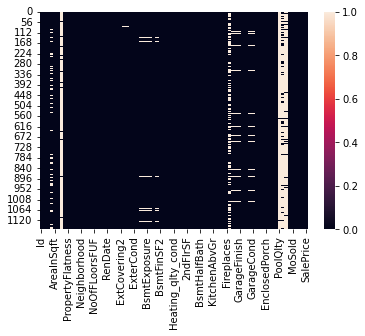

In [15]:
sns.heatmap(df.isnull())

From the above details : the total null values present in each columns are:
LinearFeetStreet:214
Alley:1091
BrickCover:7
BrickCoverArea:7
BsmtHeight:30
BsmtCond:30
BsmtExposure:31
BsmtArRatings1:30
BsmtFinType2:31
FireplaceQu:551
GarageType:64
GarageYrBlt:64
GarageFinish:64
GarageQual:64
GarageCond:64
PoolQlty:1161
FenceQlty:931
MiscFeature :1124











In [16]:
#Fill the null values using mean/median/mode depending on the dtype of columns.
df.dtypes

Id                       int64
NoOfFloors               int64
TypeOfProperty          object
LinearFeetStreet       float64
AreaInSqft               int64
Street                  object
Alley                   object
PropertyShape           object
PropertyFlatness        object
Utilities               object
PropertyConfig          object
LandSlope               object
Neighborhood            object
Condition1              object
Condition2              object
BldgType                object
NoOfFLoorsFUF           object
OverallRatingMat         int64
OverallRatingsHouse      int64
YearBuilt                int64
RenDate                  int64
RoofStyle               object
RoofMatl                object
ExtCovering1            object
ExtCovering2            object
BrickCover              object
BrickCoverArea         float64
ExtMatqlty              object
ExterCond               object
Foundation              object
BsmtHeight              object
BsmtCond                object
BsmtExpo

In [17]:
np.mean(df["LinearFeetStreet"])

70.98846960167715

In [18]:
df['LinearFeetStreet']=df['LinearFeetStreet'].fillna(np.mean(df['LinearFeetStreet']))

In [19]:
df['BrickCover'].mode()

0    None
Name: BrickCover, dtype: object

In [20]:
df['BrickCover'].fillna('None',inplace=True)

In [21]:
df['BrickCoverArea']=df['BrickCoverArea'].fillna(np.mean(df['BrickCoverArea']))

In [22]:
df['BsmtHeight'].mode()

0    TA
Name: BsmtHeight, dtype: object

In [23]:
df['BsmtHeight'].fillna('TA',inplace=True)

In [24]:
df['BsmtCond'].mode()

0    TA
Name: BsmtCond, dtype: object

In [25]:
df['BsmtCond'].fillna('TA',inplace=True)

In [26]:
df['BsmtExposure'].mode()

0    No
Name: BsmtExposure, dtype: object

In [27]:
df['BsmtExposure'].fillna('No',inplace=True)

In [28]:
df['BsmtArRatings1'].mode()

0    Unf
Name: BsmtArRatings1, dtype: object

In [29]:
df['BsmtArRatings1'].fillna('Unf',inplace=True)

In [30]:
df['BsmtFinType2'].mode()

0    Unf
Name: BsmtFinType2, dtype: object

In [31]:
df['BsmtFinType2'].fillna('Unf',inplace=True)

In [32]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

In [33]:
df['FireplaceQu'].fillna('Gd',inplace=True)

In [34]:
df['GarageType'].mode()

0    Attchd
Name: GarageType, dtype: object

In [35]:
df['GarageType'].fillna('Attchd',inplace=True)

In [36]:
df['GarageYrBlt']=df['GarageYrBlt'].fillna(np.mean(df['GarageYrBlt']))

In [37]:
df['GarageFinish'].mode()

0    Unf
Name: GarageFinish, dtype: object

In [38]:
df['GarageFinish'].fillna('Unf',inplace=True)

In [39]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

In [40]:
df['GarageQual'].fillna('TA',inplace=True)

In [41]:
df['GarageCond'].mode()

0    TA
Name: GarageCond, dtype: object

In [42]:
df['GarageCond'].fillna('TA',inplace=True)

In [43]:
df['FenceQlty'].mode()

0    MnPrv
Name: FenceQlty, dtype: object

In [44]:
df['FenceQlty'].fillna('MnPrv',inplace=True)

In [45]:
df['Alley'].mode()

0    Grvl
Name: Alley, dtype: object

In [46]:
df['Alley'].fillna('Grvl',inplace=True)

In [47]:
df['PoolQlty'].mode()

0    Gd
Name: PoolQlty, dtype: object

In [48]:
df['PoolQlty'].fillna('Gd',inplace=True)

In [49]:
df['MiscFeature'].mode()

0    Shed
Name: MiscFeature, dtype: object

In [50]:
df['MiscFeature'].fillna('Shed',inplace=True)

In [51]:
df.isnull().sum()

Id                     0
NoOfFloors             0
TypeOfProperty         0
LinearFeetStreet       0
AreaInSqft             0
Street                 0
Alley                  0
PropertyShape          0
PropertyFlatness       0
Utilities              0
PropertyConfig         0
LandSlope              0
Neighborhood           0
Condition1             0
Condition2             0
BldgType               0
NoOfFLoorsFUF          0
OverallRatingMat       0
OverallRatingsHouse    0
YearBuilt              0
RenDate                0
RoofStyle              0
RoofMatl               0
ExtCovering1           0
ExtCovering2           0
BrickCover             0
BrickCoverArea         0
ExtMatqlty             0
ExterCond              0
Foundation             0
BsmtHeight             0
BsmtCond               0
BsmtExposure           0
BsmtArRatings1         0
BsmtSqft               0
BsmtFinType2           0
BsmtFinSF2             0
BsmtAreaUnf            0
TotalSqftBsmtArea      0
Heating                0


In [52]:
df.columns

Index(['Id', 'NoOfFloors', 'TypeOfProperty', 'LinearFeetStreet', 'AreaInSqft',
       'Street', 'Alley', 'PropertyShape', 'PropertyFlatness', 'Utilities',
       'PropertyConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'NoOfFLoorsFUF', 'OverallRatingMat',
       'OverallRatingsHouse', 'YearBuilt', 'RenDate', 'RoofStyle', 'RoofMatl',
       'ExtCovering1', 'ExtCovering2', 'BrickCover', 'BrickCoverArea',
       'ExtMatqlty', 'ExterCond', 'Foundation', 'BsmtHeight', 'BsmtCond',
       'BsmtExposure', 'BsmtArRatings1', 'BsmtSqft', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtAreaUnf', 'TotalSqftBsmtArea', 'Heating',
       'Heating_qlty_cond', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQltySqftF', 'GroundSqft', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'HomeFunctionality', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFin

In [53]:
df.shape

(1168, 81)

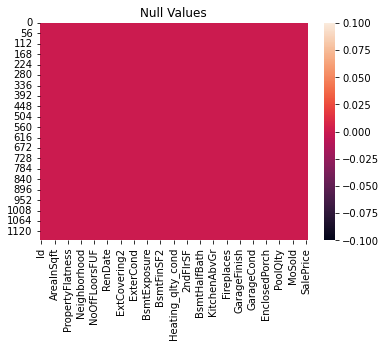

In [54]:
sns.heatmap(df.isnull())  #plot to show there are no null values present
plt.title("Null Values")
plt.show()

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   1168 non-null   int64  
 1   NoOfFloors           1168 non-null   int64  
 2   TypeOfProperty       1168 non-null   object 
 3   LinearFeetStreet     1168 non-null   float64
 4   AreaInSqft           1168 non-null   int64  
 5   Street               1168 non-null   object 
 6   Alley                1168 non-null   object 
 7   PropertyShape        1168 non-null   object 
 8   PropertyFlatness     1168 non-null   object 
 9   Utilities            1168 non-null   object 
 10  PropertyConfig       1168 non-null   object 
 11  LandSlope            1168 non-null   object 
 12  Neighborhood         1168 non-null   object 
 13  Condition1           1168 non-null   object 
 14  Condition2           1168 non-null   object 
 15  BldgType             1168 non-null   o

In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1168.0,724.136130,416.159877,1.0,360.50,714.500000,1079.50,1460.0
NoOfFloors,1168.0,56.767979,41.940650,20.0,20.00,50.000000,70.00,190.0
LinearFeetStreet,1168.0,70.988470,22.437056,21.0,60.00,70.988470,79.25,313.0
AreaInSqft,1168.0,10484.749144,8957.442311,1300.0,7621.50,9522.500000,11515.50,164660.0
OverallRatingMat,1168.0,6.104452,1.390153,1.0,5.00,6.000000,7.00,10.0
OverallRatingsHouse,1168.0,5.595890,1.124343,1.0,5.00,5.000000,6.00,9.0
YearBuilt,1168.0,1970.930651,30.145255,1875.0,1954.00,1972.000000,2000.00,2010.0
RenDate,1168.0,1984.758562,20.785185,1950.0,1966.00,1993.000000,2004.00,2010.0
BrickCoverArea,1168.0,102.310078,182.047152,0.0,0.00,0.000000,160.00,1600.0
BsmtSqft,1168.0,444.726027,462.664785,0.0,0.00,385.500000,714.50,5644.0


From the above stat summary , we can see that :1) the standard deviation is very high in columns-AreaInSqft(8957.442311),BrickCoverArea(182.047152)
  BsmtSqft(462.664785) , BsmtFinSF2(163.520016),BsmtAreaUnf(449.375525),TotalSqftBsmtArea(442.272249),1stFlrSF(391.161983),2ndFlrSF(439.696370),
GroundSqft(528.042957),GarageArea(214.466769),WoodDeckSF(126.158988),MiscVal(543.264432), which means that the data spread is high.

2) In the columns : AreaInSqft,BsmtSqft,BrickCoverArea,BsmtSqft,BsmtFinSF2,2ndFlrSF,LowQltySqftF,GroundSqft,WoodDeckSF,OpenPorchSF,EnclosedPorch
EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal--- which means that skewness is present, one sided data [right/left]

3)Also, if there is large gap between 75% and max values , for columns such as :NoOfFloors,LinearFeetStreet,AreaInSqft,BrickCoverArea,BsmtSqft,BsmtFinSF2,BsmtAreaUnf,
TotalSqftBsmtArea,1stFlrSF,2ndFlrSF,LowQltySqftF,GroundSqft,TotRmsAbvGrd,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
It means that outliers are present.

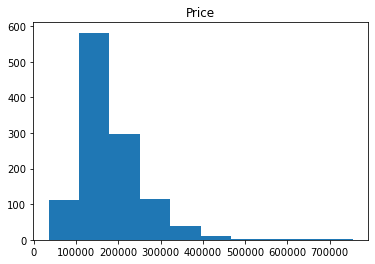

In [57]:
#target variable
df['SalePrice'].hist(grid=False)
plt.title("Price")
plt.show()

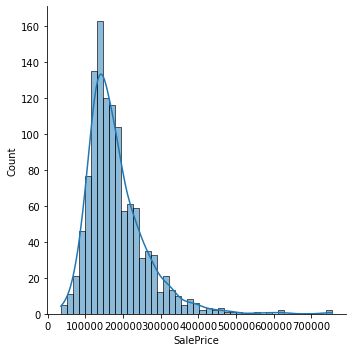

In [58]:
sns.displot(df['SalePrice'],kde=True)

From the above graphs , we can see that the price is majorly in range 50,000 to 500000

# Univariate Analysis

In [59]:
df.sample(10)

,Id,NoOfFloors,TypeOfProperty,LinearFeetStreet,AreaInSqft,Street,Alley,PropertyShape,PropertyFlatness,Utilities,...,PoolArea,PoolQlty,FenceQlty,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
638,32,20,RL,70.98847,8544,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,6,2008,WD,Normal,149350
175,499,20,RL,65.00000,7800,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,6,2009,WD,Normal,130000
296,158,60,RL,92.00000,12003,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,5,2010,New,Partial,269500
684,601,60,RL,74.00000,10927,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,6,2006,WD,Normal,275000
424,568,20,RL,70.00000,10171,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,3,2010,WD,Normal,214000
890,967,50,RL,130.00000,9600,Pave,Grvl,IR1,HLS,AllPub,...,0,Gd,MnPrv,Shed,0,6,2009,WD,Normal,160000
301,718,20,RL,80.00000,10000,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,11,2008,WD,Normal,157000
1131,522,20,RL,90.00000,11988,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,150000
895,502,60,FV,75.00000,9803,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,226700
262,96,60,RL,70.98847,9765,Pave,Grvl,IR2,Lvl,AllPub,...,0,Gd,MnPrv,Shed,480,4,2009,WD,Normal,185000


In [60]:
df['NoOfFloors'].value_counts()

20     428
60     244
50     113
120     69
70      53
30      52
160     47
80      43
90      41
190     26
85      19
75      14
45      10
180      6
40       3
Name: NoOfFloors, dtype: int64

<AxesSubplot:>

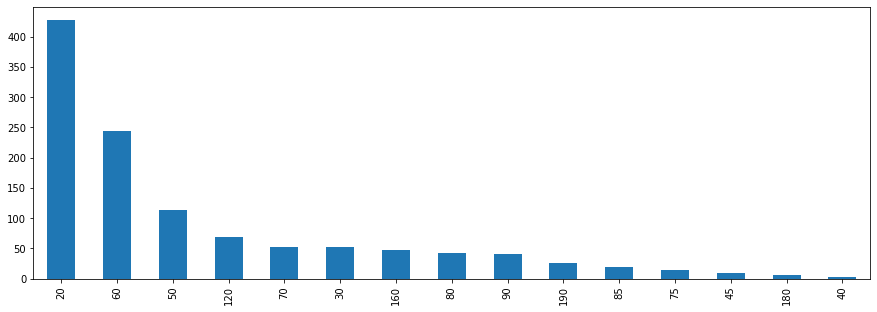

In [61]:
df['NoOfFloors'].value_counts().plot(kind='bar',figsize=(15,5))

From the above observation we can see that maximum people have involved in (1-STORY 1946 & NEWER ALL STYLES), next opted for (2-STORY 1946 & NEWER) and lowest option is for (1-STORY W/FINISHED ATTIC ALL AGES)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   1168 non-null   int64  
 1   NoOfFloors           1168 non-null   int64  
 2   TypeOfProperty       1168 non-null   object 
 3   LinearFeetStreet     1168 non-null   float64
 4   AreaInSqft           1168 non-null   int64  
 5   Street               1168 non-null   object 
 6   Alley                1168 non-null   object 
 7   PropertyShape        1168 non-null   object 
 8   PropertyFlatness     1168 non-null   object 
 9   Utilities            1168 non-null   object 
 10  PropertyConfig       1168 non-null   object 
 11  LandSlope            1168 non-null   object 
 12  Neighborhood         1168 non-null   object 
 13  Condition1           1168 non-null   object 
 14  Condition2           1168 non-null   object 
 15  BldgType             1168 non-null   o

In [63]:
df['TypeOfProperty'].value_counts()

RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: TypeOfProperty, dtype: int64

<AxesSubplot:>

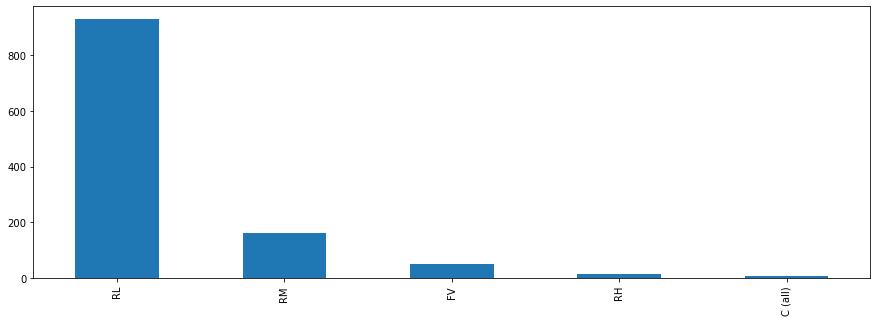

In [64]:
df['TypeOfProperty'].value_counts().plot(kind='bar',figsize=(15,5))

From the above graph we can see that the maximum people have opted for RF(Residential Low Density), next with RM(Residential Medium Density), and the least option being for C(Commercial) ,where as no people opt for (Residential Low Density Park ),Agriculture and Industrial

In [65]:
df['AreaInSqft'].value_counts()

9600     21
7200     18
6000     16
8400     14
9000     11
         ..
12803     1
9480      1
13478     1
12122     1
7861      1
Name: AreaInSqft, Length: 892, dtype: int64

<AxesSubplot:>

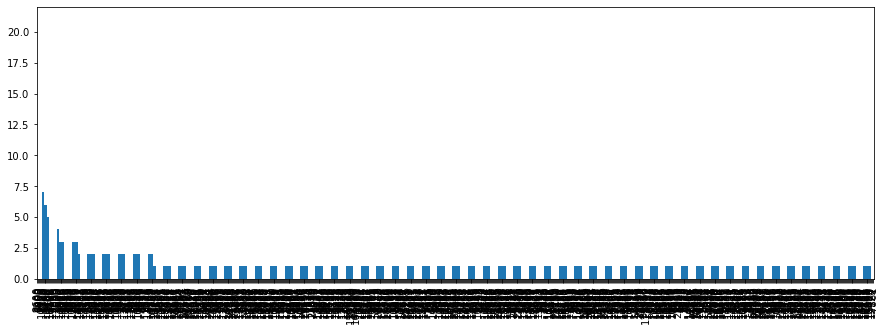

In [66]:
df['AreaInSqft'].value_counts().plot(kind='bar',figsize=(15,5))

In [67]:
df['OverallRatingMat'].value_counts()

5     314
6     295
7     260
8     138
4      93
9      32
3      16
10     15
2       3
1       2
Name: OverallRatingMat, dtype: int64

<AxesSubplot:>

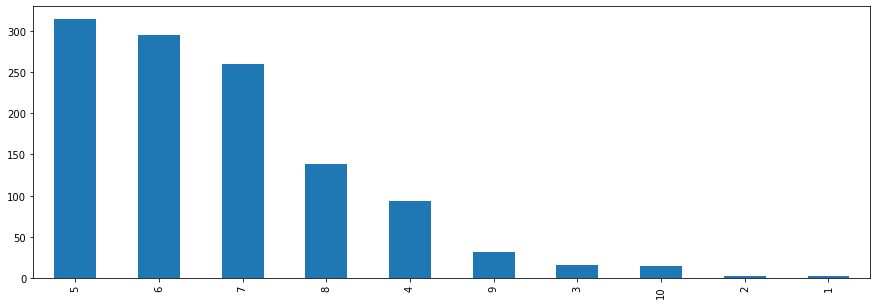

In [68]:
df['OverallRatingMat'].value_counts().plot(kind='bar',figsize=(15,5))

From the above Observation we can see that , the highest rating for material and finish of house is - Average, Above Average,Good , where as the least ratings is for very poor 

In [69]:
df['OverallRatingsHouse'].value_counts()

5    640
6    209
7    172
8     61
4     43
3     21
9     16
2      5
1      1
Name: OverallRatingsHouse, dtype: int64

<AxesSubplot:>

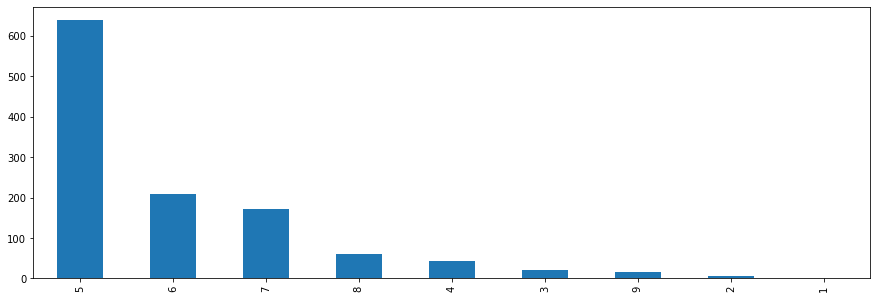

In [70]:
df['OverallRatingsHouse'].value_counts().plot(kind='bar',figsize=(15,5))

From  the above observation we can see that overall condition of the house is rated as 5(Average),next being Avobe average,Good and very good , with the least ratings being for very poor , we can also see that no ratings are given for Very Excellent and Excellent

In [71]:
df['YearBuilt'].value_counts() # Orginal Construction dates 

2006    57
2005    51
2007    41
2004    37
2003    33
        ..
1927     1
1911     1
2010     1
1892     1
1913     1
Name: YearBuilt, Length: 110, dtype: int64

In [72]:
df['RenDate'].value_counts() #renovation dates(if done)

1950    146
2006     82
2007     64
2005     57
2004     46
2000     44
2002     41
2003     37
1996     31
2008     30
1998     26
1999     25
1995     24
1970     20
1976     20
2009     20
1997     19
1993     18
1977     18
1994     16
2001     16
1971     16
1965     15
1972     15
1959     13
1962     13
1991     13
1969     13
1966     13
1978     13
1992     13
1958     12
1968     11
1963     11
1990     11
1954     11
1967     10
1989      9
1960      9
1979      9
1980      9
1975      9
1956      9
1961      8
1953      8
1957      8
1981      8
1973      8
1955      7
1987      7
1964      7
1988      7
1985      6
1982      6
2010      5
1986      5
1984      5
1951      4
1983      4
1952      4
1974      4
Name: RenDate, dtype: int64

In [73]:
df['BrickCoverArea'].value_counts()

0.000000      692
102.310078      7
72.000000       7
180.000000      6
120.000000      6
             ... 
653.000000      1
975.000000      1
226.000000      1
204.000000      1
31.000000       1
Name: BrickCoverArea, Length: 284, dtype: int64

In [74]:
df['BsmtSqft'].value_counts()

0      375
24      10
16       8
20       5
616      5
      ... 
586      1
412      1
416      1
602      1
457      1
Name: BsmtSqft, Length: 551, dtype: int64

In [75]:
df['BsmtFinSF2'].value_counts()

0      1032
180       5
41        2
147       2
117       2
       ... 
531       1
40        1
121       1
608       1
546       1
Name: BsmtFinSF2, Length: 122, dtype: int64

In [76]:
df['BsmtAreaUnf'].value_counts()

0      97
728     8
440     6
600     6
300     6
       ..
323     1
487     1
349     1
793     1
649     1
Name: BsmtAreaUnf, Length: 681, dtype: int64

In [77]:
df['1stFlrSF'].value_counts()

864     19
1040    13
912     12
894     10
848      9
        ..
1516     1
813      1
2633     1
1015     1
807      1
Name: 1stFlrSF, Length: 669, dtype: int64

In [78]:
df['2ndFlrSF'].value_counts()

0       663
728       9
504       7
600       6
672       6
       ... 
1066      1
467       1
1038      1
881       1
978       1
Name: 2ndFlrSF, Length: 351, dtype: int64

In [79]:
df['LowQltySqftF'].value_counts()

0      1145
80        3
360       2
384       1
420       1
473       1
371       1
232       1
513       1
481       1
515       1
514       1
120       1
528       1
572       1
144       1
234       1
390       1
156       1
53        1
392       1
Name: LowQltySqftF, dtype: int64

In [80]:
df['GroundSqft'].value_counts()

864     16
1040    11
894     10
1456     9
1200     8
        ..
1610     1
2576     1
2810     1
1691     1
1509     1
Name: GroundSqft, Length: 746, dtype: int64

In [81]:
df['BsmtFullBath'].value_counts()   #Basement full bathrooms

0    686
1    468
2     13
3      1
Name: BsmtFullBath, dtype: int64

<AxesSubplot:>

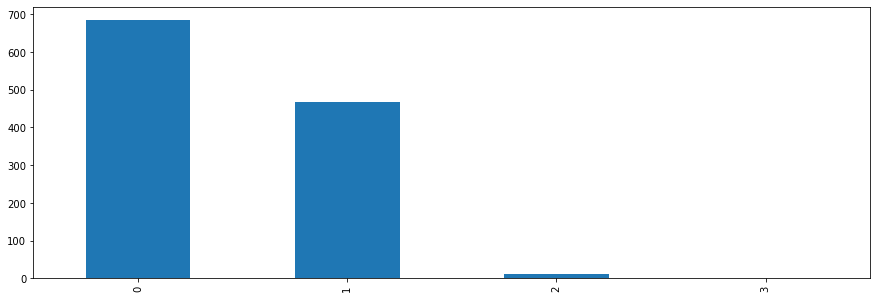

In [82]:
df['BsmtFullBath'].value_counts().plot(kind='bar',figsize=(15,5))

In [83]:
df['BsmtHalfBath'].value_counts() #Basement half bathrooms

0    1105
1      61
2       2
Name: BsmtHalfBath, dtype: int64

<AxesSubplot:>

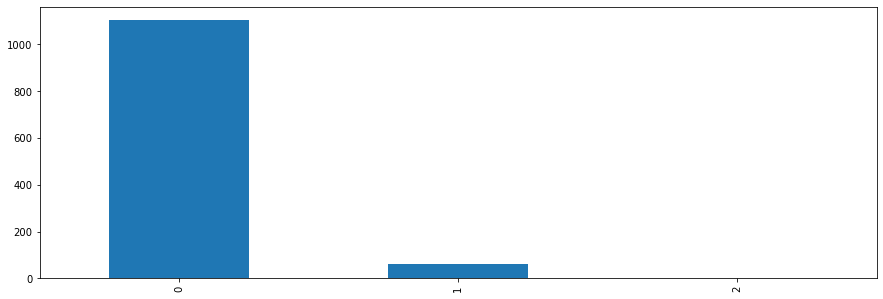

In [84]:
df['BsmtHalfBath'].value_counts().plot(kind='bar',figsize=(15,5))

From the above observation we can see that there are mostly no bathrooms in basement and if present there are Full bathrooms present, with very few of half bathrooms present

In [85]:
df['FullBath'].value_counts()  #Full bathrooms above grade

2    610
1    524
3     27
0      7
Name: FullBath, dtype: int64

<AxesSubplot:>

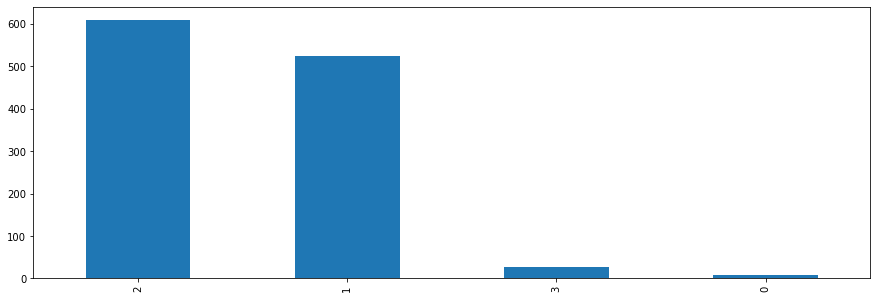

In [86]:
df['FullBath'].value_counts().plot(kind='bar',figsize=(15,5)) #Full bathrooms above grade

In [87]:
df['HalfBath'].value_counts()

0    724
1    434
2     10
Name: HalfBath, dtype: int64

<AxesSubplot:>

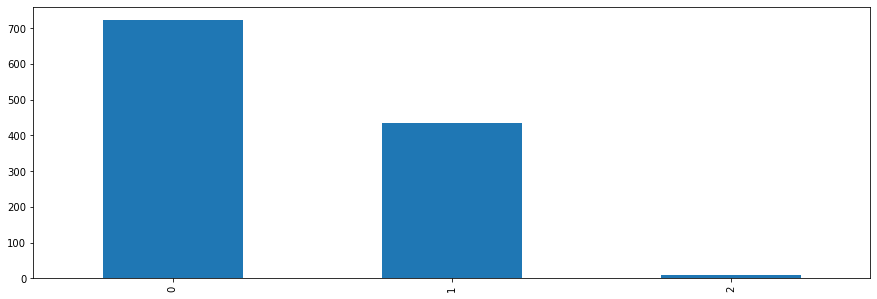

In [88]:
df['HalfBath'].value_counts().plot(kind='bar',figsize=(15,5)) #Half bathrooms above grade

From the above observations we can see that there are no Half bathrooms above grade , with an average of 1 bathroom only , where as we can see there are many houses with 2 full bathrooms above grade and next 1 bathroom above grade. There are very few houses with no bathrooms above grade

In [89]:
df['BedroomAbvGr'].value_counts()

3    640
2    281
4    180
1     39
5     18
6      5
0      4
8      1
Name: BedroomAbvGr, dtype: int64

<AxesSubplot:>

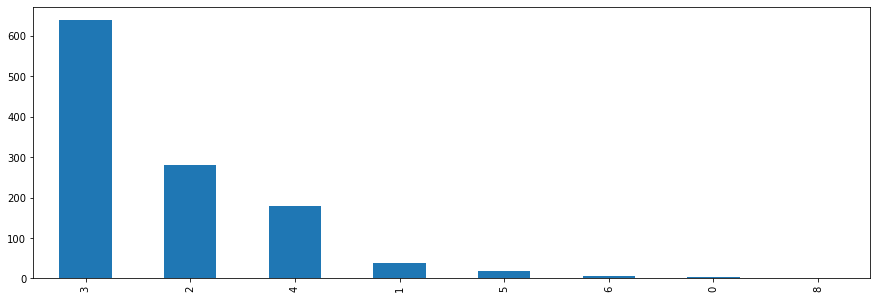

In [90]:
df['BedroomAbvGr'].value_counts().plot(kind='bar',figsize=(15,5))

From the above observation we can see that more than 50% of houses have 3 bedrooms above grade , below 50% , there are 2 and 4 beedrooms present and very few houses(below 50) have 5 and 6 beedrooms above grade 

In [91]:
df['KitchenAbvGr'].value_counts()

1    1114
2      52
3       1
0       1
Name: KitchenAbvGr, dtype: int64

<AxesSubplot:>

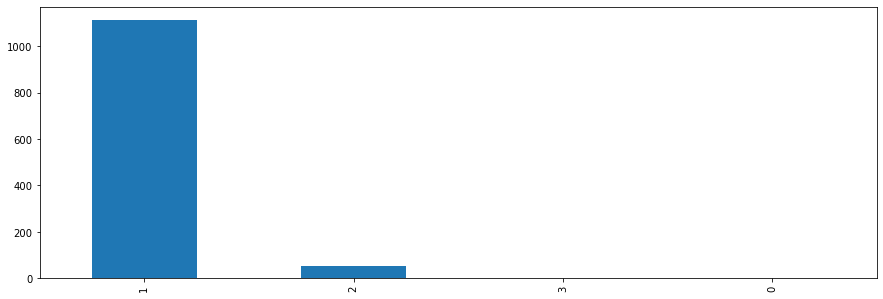

In [92]:
df['KitchenAbvGr'].value_counts().plot(kind='bar',figsize=(15,5))

From the above observation we can see that most of the houses have 1 kitchen above grade , where as less than 25 houses have 2 kitches above grade , and there are no houses with No or 3 kitchens

In [93]:
df['TotRmsAbvGrd'].value_counts()

6     325
7     268
5     217
8     148
4      72
9      65
10     41
11     13
3      11
12      6
2       1
14      1
Name: TotRmsAbvGrd, dtype: int64

<AxesSubplot:>

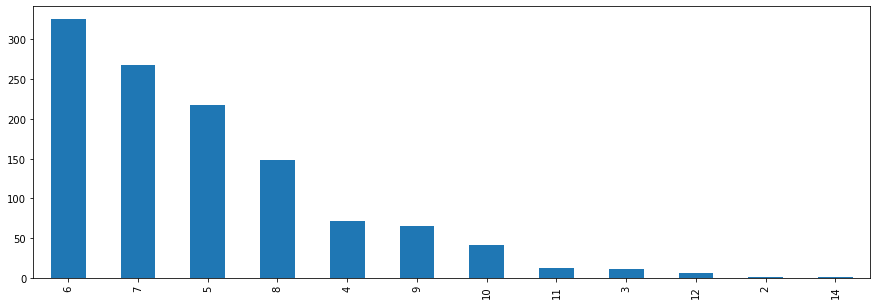

In [94]:
df['TotRmsAbvGrd'].value_counts().plot(kind='bar',figsize=(15,5))

From the above observation we can see that 325 houses have 6 rooms at max above grade , 268 houses have 7 rooms ,217 houses have 5 rooms , only 1 house has 14 rooms and only 1 house has 2 rooms above grade

In [95]:
df['Fireplaces'].value_counts()

0    551
1    518
2     94
3      5
Name: Fireplaces, dtype: int64

<AxesSubplot:>

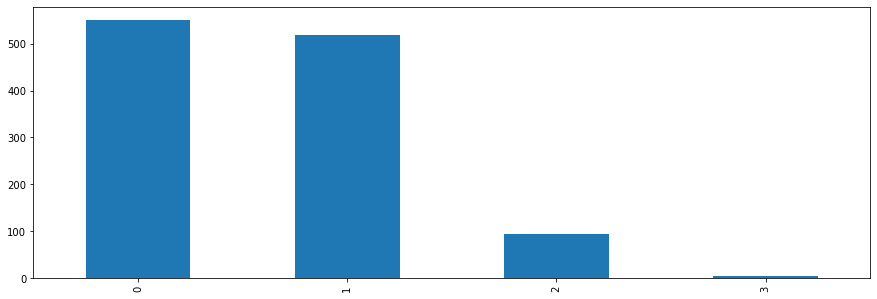

In [96]:
df['Fireplaces'].value_counts().plot(kind='bar',figsize=(15,5))

From the above observation we can see that 551 houses has no fireplaces, where as 518 houses have atleast 1 fireplace , very few houses (94)have 2 fireplaces and only 3 houses have 5 fireplaces . Also we can see that there are no houses with no fireplace

In [97]:
df['GarageYrBlt'].value_counts()

1978.193841    64
2006.000000    52
2005.000000    51
2007.000000    40
2003.000000    37
               ..
1900.000000     1
1927.000000     1
1908.000000     1
1933.000000     1
1906.000000     1
Name: GarageYrBlt, Length: 98, dtype: int64

In [98]:
df['GarageCars'].value_counts()  #size of garage in car capacity

2    665
1    288
3    147
0     64
4      4
Name: GarageCars, dtype: int64

<AxesSubplot:>

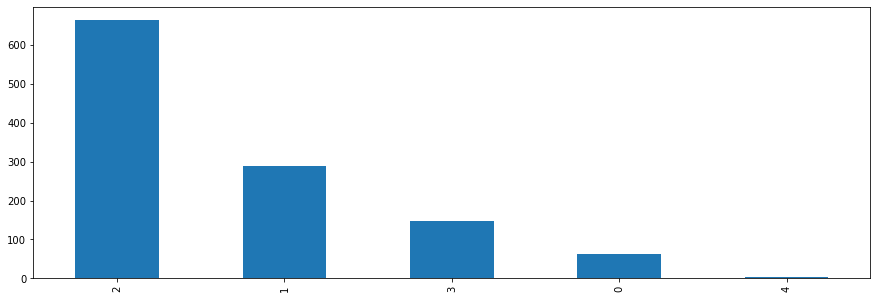

In [99]:
df['GarageCars'].value_counts().plot(kind='bar',figsize=(15,5))

From the above observation we can see that 665 houses have the garage with 2 cars capacity

In [102]:
df['GarageArea'].value_counts()

0      64
440    44
576    39
240    31
528    26
       ..
748     1
433     1
818     1
604     1
250     1
Name: GarageArea, Length: 392, dtype: int64

In [103]:
df['WoodDeckSF'].value_counts()

0      603
144     29
192     28
100     26
120     25
      ... 
278      1
70       1
351      1
314      1
87       1
Name: WoodDeckSF, Length: 244, dtype: int64

In [104]:
df['OpenPorchSF'].value_counts()

0      531
36      24
48      18
20      17
39      14
      ... 
406      1
176      1
137      1
135      1
15       1
Name: OpenPorchSF, Length: 176, dtype: int64

In [105]:
df['EnclosedPorch'].value_counts()

0      999
112     13
96       6
192      5
216      5
      ... 
80       1
242      1
136      1
272      1
172      1
Name: EnclosedPorch, Length: 106, dtype: int64

In [106]:
df['3SsnPorch'].value_counts()

0      1146
168       3
216       2
180       2
144       2
153       1
23        1
304       1
130       1
182       1
290       1
238       1
245       1
162       1
96        1
140       1
196       1
508       1
Name: 3SsnPorch, dtype: int64

In [107]:
df['ScreenPorch'].value_counts()

0      1073
192       5
224       5
189       4
180       3
120       3
168       3
160       3
126       3
144       2
288       2
176       2
142       2
184       2
147       2
100       2
200       2
90        2
216       2
260       1
287       1
198       1
170       1
440       1
175       1
385       1
161       1
163       1
197       1
145       1
259       1
143       1
252       1
190       1
291       1
40        1
322       1
154       1
156       1
165       1
60        1
63        1
225       1
95        1
265       1
53        1
480       1
128       1
140       1
410       1
204       1
155       1
182       1
116       1
178       1
185       1
153       1
266       1
222       1
271       1
273       1
99        1
122       1
80        1
130       1
Name: ScreenPorch, dtype: int64

In [108]:
df['PoolArea'].value_counts()

0      1161
555       1
576       1
738       1
519       1
480       1
648       1
512       1
Name: PoolArea, dtype: int64

<AxesSubplot:>

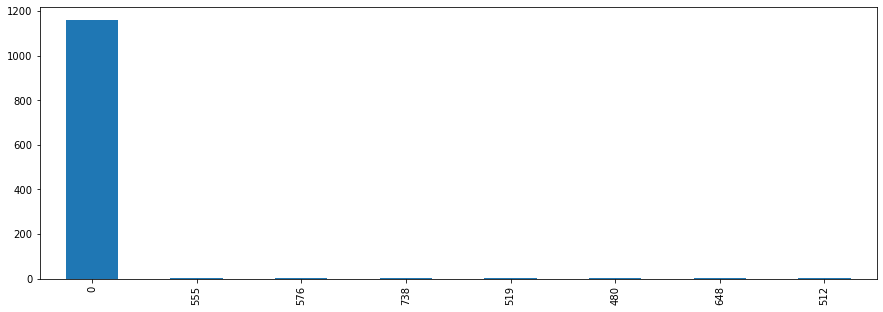

In [109]:
df['PoolArea'].value_counts().plot(kind='bar',figsize=(15,5))

In [110]:
df['FenceQlty'].value_counts()

MnPrv    1060
GdPrv      51
GdWo       47
MnWw       10
Name: FenceQlty, dtype: int64

<AxesSubplot:>

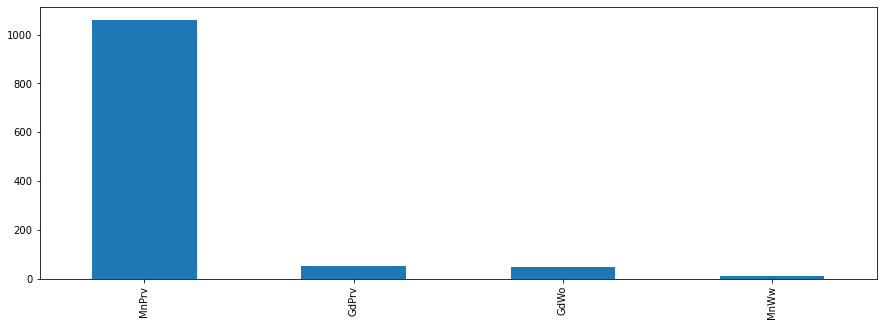

In [111]:
df['FenceQlty'].value_counts().plot(kind='bar',figsize=(15,5))

From the above observation we can see that Minimum Privacy of Fenceqlty is provided for most of the houses, only 10 houses have Minimum Wood/Wire fenceing , there are no houses with no fence 

In [112]:
df['MiscVal'].value_counts()

0        1126
400        10
500         7
2000        4
600         3
700         3
1200        2
1150        1
480         1
1300        1
1400        1
8300        1
620         1
15500       1
450         1
800         1
54          1
350         1
560         1
2500        1
Name: MiscVal, dtype: int64

<AxesSubplot:>

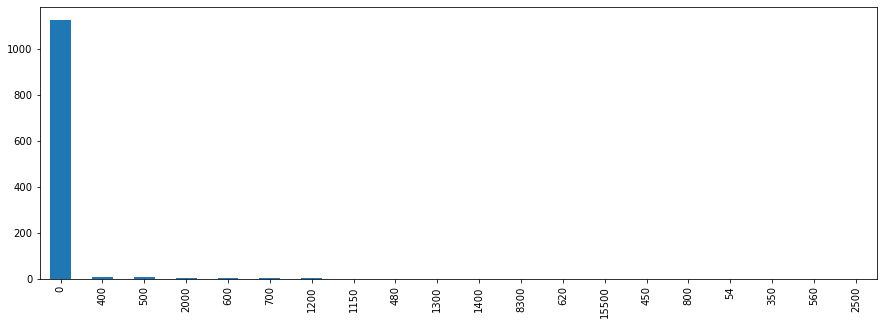

In [113]:
df['MiscVal'].value_counts().plot(kind='bar',figsize=(15,5))

From the above observation we can see that most of the house(1126) has no Miscellaneous features 

In [116]:
df['MoSold'].value_counts()

6     203
7     187
5     166
4     113
8      95
3      87
11     67
10     66
9      57
12     46
1      44
2      37
Name: MoSold, dtype: int64

<AxesSubplot:>

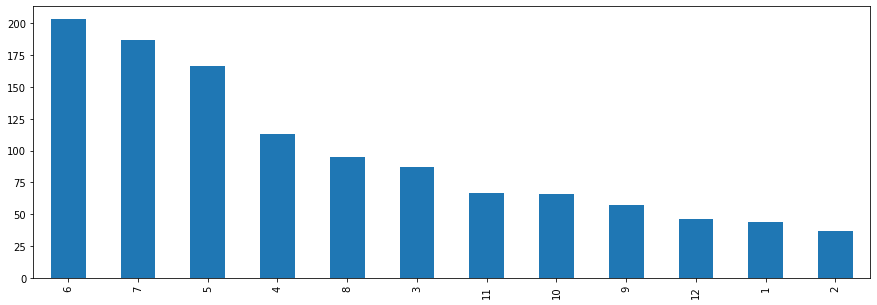

In [117]:
df['MoSold'].value_counts().plot(kind='bar',figsize=(15,5))

Form the above observation we can see that most of the houses are sold in the month of june, while  next in the months april, may and july, where as the least number of houses are sold in jan and feb

In [118]:
df['YrSold'].value_counts()

2007    264
2009    260
2006    254
2008    248
2010    142
Name: YrSold, dtype: int64

<AxesSubplot:>

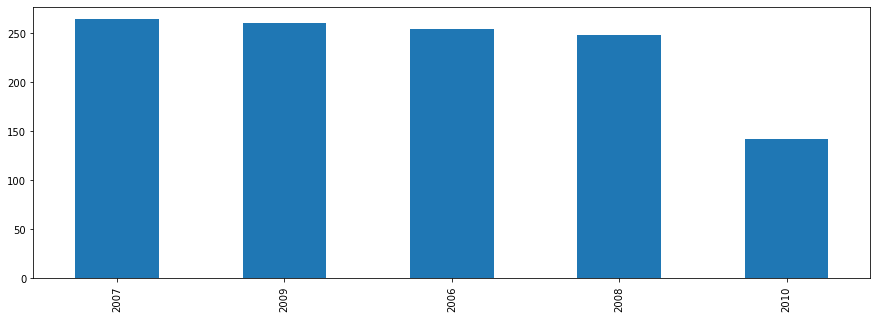

In [119]:
df['YrSold'].value_counts().plot(kind='bar',figsize=(15,5))

From the above observation we can see that year 2007 has max sale of houses , the years 2009,2008 and 2006 have an average sales , where as 2010 has the least no of sales

In [120]:
df['SaleType'].value_counts()

WD       999
New      106
COD       38
ConLD      8
ConLI      5
ConLw      4
Oth        3
CWD        3
Con        2
Name: SaleType, dtype: int64

In [121]:
df['SaleCondition'].value_counts()

Normal     945
Partial    108
Abnorml     81
Family      18
Alloca      12
AdjLand      4
Name: SaleCondition, dtype: int64

<AxesSubplot:>

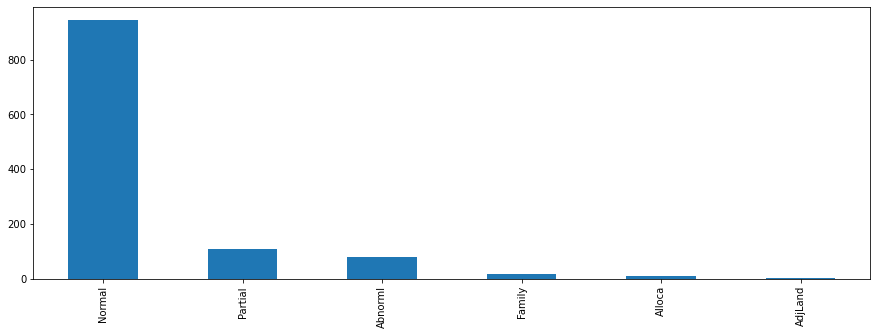

In [122]:
df['SaleCondition'].value_counts().plot(kind='bar',figsize=(15,5))

From the above observation we can see that 945 houses are of normal sale, 108 houses are of partial (Home was not completed when last assessed),the least (only 4)are with Adjoining Land Purchase

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   1168 non-null   int64  
 1   NoOfFloors           1168 non-null   int64  
 2   TypeOfProperty       1168 non-null   object 
 3   LinearFeetStreet     1168 non-null   float64
 4   AreaInSqft           1168 non-null   int64  
 5   Street               1168 non-null   object 
 6   Alley                1168 non-null   object 
 7   PropertyShape        1168 non-null   object 
 8   PropertyFlatness     1168 non-null   object 
 9   Utilities            1168 non-null   object 
 10  PropertyConfig       1168 non-null   object 
 11  LandSlope            1168 non-null   object 
 12  Neighborhood         1168 non-null   object 
 13  Condition1           1168 non-null   object 
 14  Condition2           1168 non-null   object 
 15  BldgType             1168 non-null   o

RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: TypeOfProperty, dtype: int64


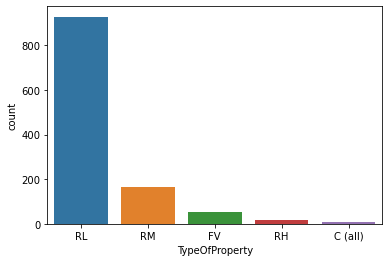

In [124]:
#For categorical columns
ax=sns.countplot(x='TypeOfProperty',data=df)
print(df['TypeOfProperty'].value_counts())

From the above observation we can see that 928 houses are of Residential Low Density, 163 are of Residential Medium Density, the least i,e 9 are for commercial and none of the houses are for agricluture

Pave    1164
Grvl       4
Name: Street, dtype: int64


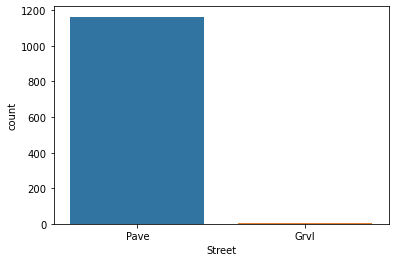

In [125]:
ax=sns.countplot(x='Street',data=df)
print(df['Street'].value_counts())

From the above observation we can see that the highest houses are of Pave(1164),Type of road access to property and only 4 belong to grvl

Reg    740
IR1    390
IR2     32
IR3      6
Name: PropertyShape, dtype: int64


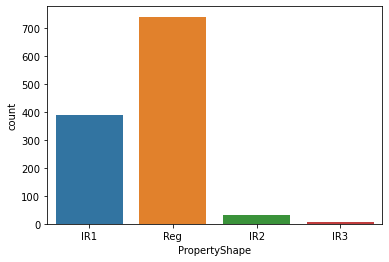

In [126]:
ax=sns.countplot(x='PropertyShape',data=df)
print(df['PropertyShape'].value_counts())

From the above abservation we can see that shape of property is almost Regular(740), some are Slightly irregular(390) and very few are Irregular

Lvl    1046
Bnk      50
HLS      42
Low      30
Name: PropertyFlatness, dtype: int64


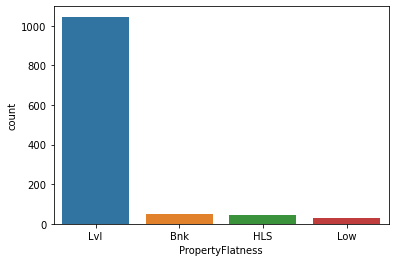

In [127]:
ax=sns.countplot(x='PropertyFlatness',data=df)
print(df['PropertyFlatness'].value_counts())

From the above observation we can see that mostly(1046) houses are Near Flat/Level, and the least are Depression(30)

AllPub    1168
Name: Utilities, dtype: int64


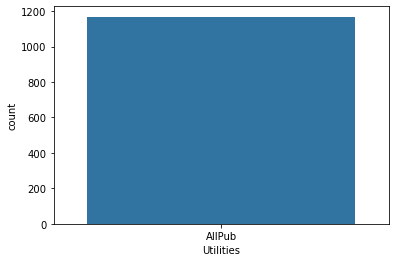

In [128]:
ax=sns.countplot(x='Utilities',data=df)
print(df['Utilities'].value_counts())

From the above observation we can see that all the houses have All public Utilities (E,G,W,& S) --->all necessary utilities are available

Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: PropertyConfig, dtype: int64


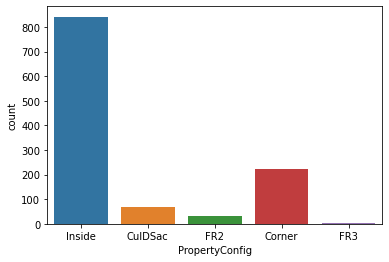

In [129]:
ax=sns.countplot(x='PropertyConfig',data=df)
print(df['PropertyConfig'].value_counts())

From the above observation we can see that configuration is Inside for (842) houses, 222 are corner houses and the least are Frontage on 3 sides of property(2) 

Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64


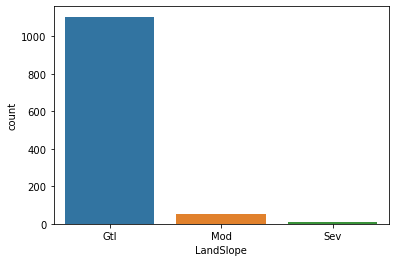

In [130]:
ax=sns.countplot(x='LandSlope',data=df)
print(df['LandSlope'].value_counts())

From the above observation we can see that mostly the houses are of Gentle slope(1105), very few are of moderate slope(51) and least are of Severe Slope(12)

NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      59
SawyerW     51
BrkSide     50
Crawfor     45
NoRidge     35
Mitchel     34
IDOTRR      30
Timber      24
ClearCr     24
SWISU       21
StoneBr     19
Blmngtn     15
BrDale      11
MeadowV      9
Veenker      9
NPkVill      8
Blueste      2
Name: Neighborhood, dtype: int64


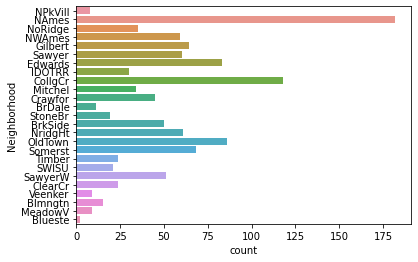

In [131]:
ax=sns.countplot(y='Neighborhood',data=df)
print(df['Neighborhood'].value_counts())

From the above observation we can see that maximum Neighborhood has North Ames(180) and the least Neighborhood has Bluestem(2)

Norm      1005
Feedr       67
Artery      38
RRAn        20
PosN        17
RRAe         9
PosA         6
RRNn         4
RRNe         2
Name: Condition1, dtype: int64


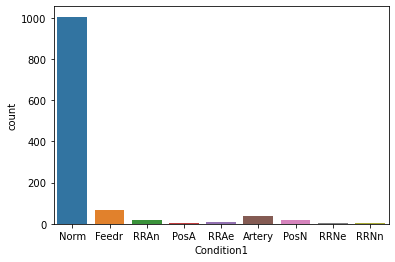

In [132]:
ax=sns.countplot(x='Condition1',data=df)
print(df['Condition1'].value_counts())

From the above observation we can see that mostly the conditions are normal(1005) and the least condition of Within 200' of East-West Railroad(2)

Norm      1154
Feedr        6
PosN         2
Artery       2
RRAe         1
RRNn         1
PosA         1
RRAn         1
Name: Condition2, dtype: int64


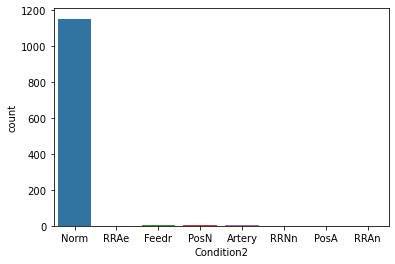

In [133]:
ax=sns.countplot(x='Condition2',data=df)
print(df['Condition2'].value_counts())

From the above observation we can see that mostly the conditions are normal(1154) and the least condition of Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

1Fam      981
TwnhsE     90
Duplex     41
Twnhs      29
2fmCon     27
Name: BldgType, dtype: int64


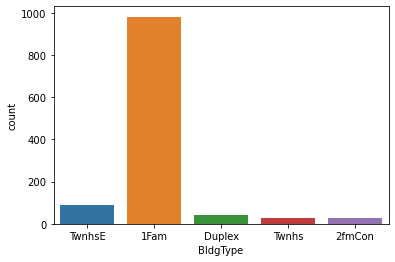

In [134]:
ax=sns.countplot(x='BldgType',data=df)
print(df['BldgType'].value_counts())

From the above observation we can see that mostly the houses are of Single-family Detached(981), few belong to Townhouse End Unit(90), and the least sre of type Two-family Conversion; originally built as one-family dwelling(27)

1Story    578
2Story    361
1.5Fin    121
SLvl       47
SFoyer     32
1.5Unf     12
2.5Unf     10
2.5Fin      7
Name: NoOfFLoorsFUF, dtype: int64


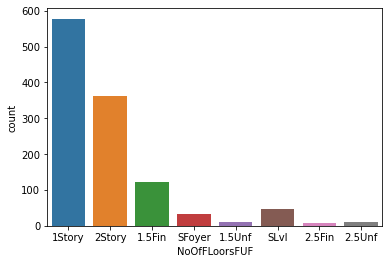

In [135]:
ax=sns.countplot(x='NoOfFLoorsFUF',data=df)
print(df['NoOfFLoorsFUF'].value_counts())

From the above observation we can see that the maximum houses are of One story[mostly for Single-family Detached]- 578, few are for Two story (361)and the least belong to Two and one-half story: 2nd level finished

Gable      915
Hip        225
Flat        12
Gambrel      9
Mansard      5
Shed         2
Name: RoofStyle, dtype: int64


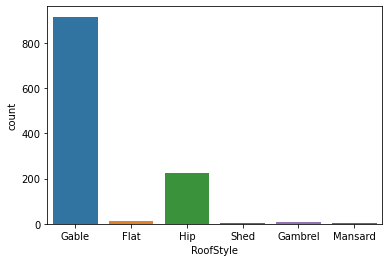

In [136]:
ax=sns.countplot(x='RoofStyle',data=df)
print(df['RoofStyle'].value_counts())

From the above observation we can see that the max houses have roof style of : Gable(915), only a few have roof style of Hip(225), and the least are of style Shed(2)

CompShg    1144
Tar&Grv      10
WdShngl       6
WdShake       4
Roll          1
ClyTile       1
Metal         1
Membran       1
Name: RoofMatl, dtype: int64


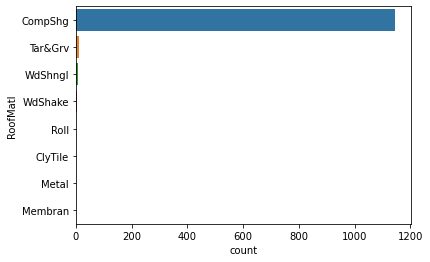

In [137]:
ax=sns.countplot(y='RoofMatl',data=df)
print(df['RoofMatl'].value_counts())

From the above observation we can see that max houses , the material used is: Standard (Composite) Shingle(1144), only a few have material: Gravel & Tar(10) 

VinylSd    396
HdBoard    179
MetalSd    178
Wd Sdng    174
Plywood     93
CemntBd     42
BrkFace     41
Stucco      22
WdShing     19
AsbShng     19
Stone        2
AsphShn      1
ImStucc      1
BrkComm      1
Name: ExtCovering1, dtype: int64


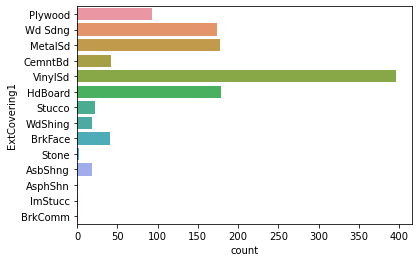

In [138]:
ax=sns.countplot(y='ExtCovering1',data=df)
print(df['ExtCovering1'].value_counts())

From the above observation we can see that max houses have external covering of Vinyl Siding(396), others are with Hard Board,Metal Siding,Wood Siding,the least are of type Brick Common,Imitation Stucco,Asphalt Shingles

VinylSd    387
MetalSd    173
HdBoard    170
Wd Sdng    165
Plywood    118
CmentBd     42
Wd Shng     31
Stucco      23
BrkFace     20
AsbShng     18
ImStucc      8
Brk Cmn      5
Stone        4
AsphShn      3
Other        1
Name: ExtCovering2, dtype: int64


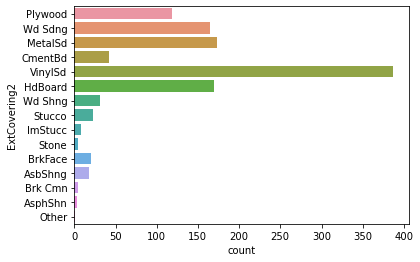

In [139]:
ax=sns.countplot(y='ExtCovering2',data=df)   #Exterior covering on house (if more than one material)
print(df['ExtCovering2'].value_counts())

From the above observation we can see that max houses have external covering of Vinyl Siding(387), others are with Hard Board,Metal Siding,Wood Siding

None       703
BrkFace    354
Stone       98
BrkCmn      13
Name: BrickCover, dtype: int64


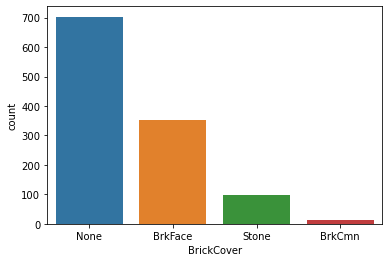

In [140]:
ax=sns.countplot(x='BrickCover',data=df)
print(df['BrickCover'].value_counts())

From the above observation we can see that, in mostly houses the brick covers are not used(703), some houses have Brick Face(354), the least are with Brick Common(13)

TA    717
Gd    397
Ex     43
Fa     11
Name: ExtMatqlty, dtype: int64


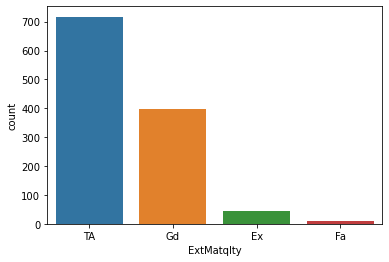

In [141]:
ax=sns.countplot(x='ExtMatqlty',data=df)
print(df['ExtMatqlty'].value_counts())

From the above observation we can see that quality of the material on the exterior is Average/Typical(717), only few houses have Good quality(397), there are no houses with poor exterior quality 

TA    1022
Gd     117
Fa      26
Ex       2
Po       1
Name: ExterCond, dtype: int64


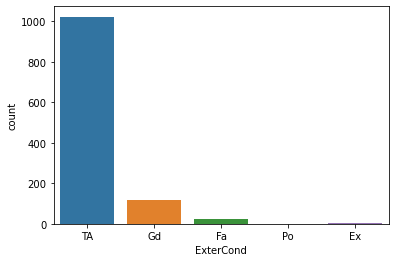

In [142]:
ax=sns.countplot(x='ExterCond',data=df)
print(df['ExterCond'].value_counts())

From the above observation we can see that the present condition of the material on the exterior is mostly Average/Typical for most of the houses[1022], some houses have good exterior quality[117], there are no houses with poor quality exterior

CBlock    516
PConc     513
BrkTil    112
Slab       21
Stone       5
Wood        1
Name: Foundation, dtype: int64


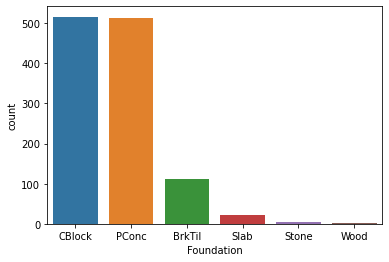

In [143]:
ax=sns.countplot(x='Foundation',data=df)
print(df['Foundation'].value_counts())

From the above observation we can see that the foundation used is both Cinder Block and Poured Contrete [some houses with CBlock (516) and some with PConc(513)], there is only 1 house which used wood as foundation

TA    547
Gd    498
Ex     94
Fa     29
Name: BsmtHeight, dtype: int64


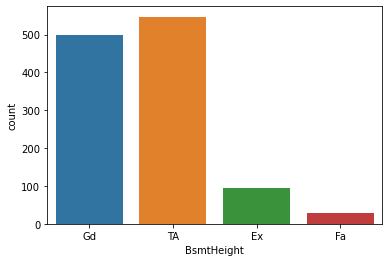

In [144]:
ax=sns.countplot(x='BsmtHeight',data=df)
print(df['BsmtHeight'].value_counts())

From the above observation we can see that the SsmtHeight is Typical (80-89 inches)(547) mostly, and Good (90-99 inches) for some houses(498),there are no houses with no basement/ poor quality basement.Also, few houses have excellent BsmtHeight(94) 

TA    1071
Gd      56
Fa      39
Po       2
Name: BsmtCond, dtype: int64


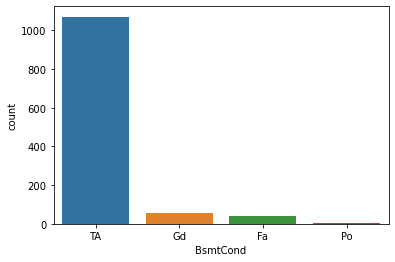

In [145]:
ax=sns.countplot(x='BsmtCond',data=df)
print(df['BsmtCond'].value_counts())

From the above observation we can see that mostly the houses have basement with Typical - slight dampness condition(1071), the least of (2) have poor condition/Poor - Severe cracking, settling, or wetness

No    787
Av    180
Gd    108
Mn     93
Name: BsmtExposure, dtype: int64


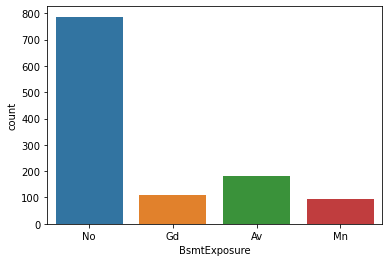

In [146]:
ax=sns.countplot(x='BsmtExposure',data=df)
print(df['BsmtExposure'].value_counts())

From the above observation we can see that mostly the houses have no exposure to walkout or garden level walls(787),some houses have Average Exposure(180), also there are no houses with no exposure

Unf    375
GLQ    330
ALQ    174
BLQ    121
Rec    109
LwQ     59
Name: BsmtArRatings1, dtype: int64


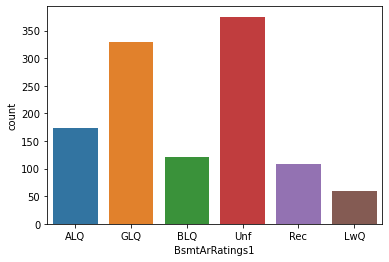

In [147]:
ax=sns.countplot(x='BsmtArRatings1',data=df)
print(df['BsmtArRatings1'].value_counts())

From the above observation we can see that some houses have the Basement area Unfinished(375),some houses have Good Living Quarters basement(330),only few houses have low quality basement(59)

Unf    1033
Rec      43
LwQ      40
BLQ      24
ALQ      16
GLQ      12
Name: BsmtFinType2, dtype: int64


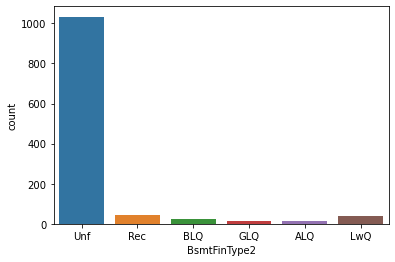

In [148]:
ax=sns.countplot(x='BsmtFinType2',data=df)
print(df['BsmtFinType2'].value_counts())

From the above observation we can see that mostly Rating of basement finished area is Unfinished(1033), very few houses have Good Living Quarters(12)

GasA     1143
GasW       14
Grav        5
Wall        4
Floor       1
OthW        1
Name: Heating, dtype: int64


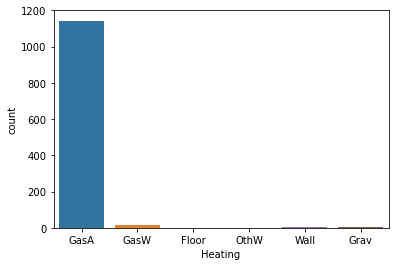

In [149]:
ax=sns.countplot(x='Heating',data=df)
print(df['Heating'].value_counts())

From the above observation we can see that max houses have Gas forced warm air furnace type of heating, very few have Gas hot water or steam heat(14)

Ex    585
TA    352
Gd    192
Fa     38
Po      1
Name: Heating_qlty_cond, dtype: int64


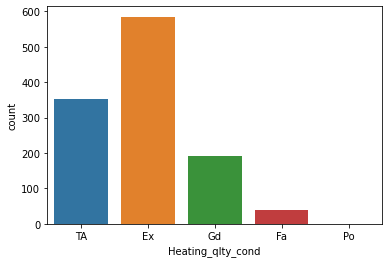

In [150]:
ax=sns.countplot(x='Heating_qlty_cond',data=df)
print(df['Heating_qlty_cond'].value_counts())

From the above observation we can see that heating quality condition is Excellent in most of the houses(585), some houses have typical/average condition(352), and few houses have good heating quality conditions(192)

Y    1090
N      78
Name: CentralAir, dtype: int64


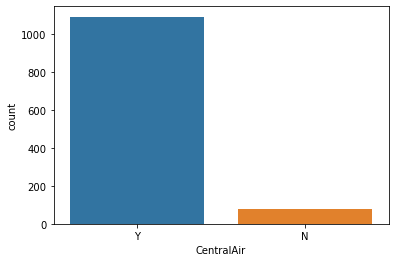

In [151]:
ax=sns.countplot(x='CentralAir',data=df)
print(df['CentralAir'].value_counts())

From the above observation we can see that most of the houses have Central air conditioning(1090), and remaining houses have No Central air conditioning
(78)


SBrkr    1070
FuseA      74
FuseF      21
FuseP       2
Mix         1
Name: Electrical, dtype: int64


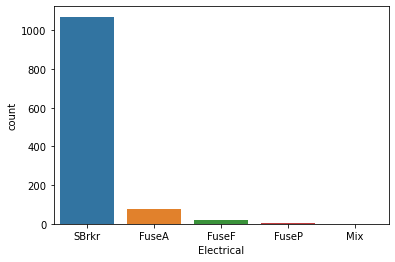

In [152]:
ax=sns.countplot(x='Electrical',data=df)
print(df['Electrical'].value_counts())

From the above observation we can see that most houses have Standard Circuit Breakers & Romex electrical system, very few have use Box over 60 AMP and all Romex wiring (Average)(74)

TA    578
Gd    478
Ex     82
Fa     30
Name: KitchenQual, dtype: int64


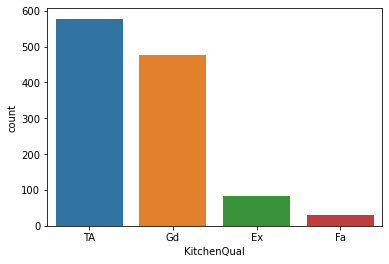

In [153]:
ax=sns.countplot(x='KitchenQual',data=df)
print(df['KitchenQual'].value_counts())

From the above observation we can see that mostly the kitchen quality is Typical/average and good (578) and(478), only some houses have excellent kitchen quality(82), there are no houses with poor quality kitchens

Typ     1085
Min2      30
Min1      25
Mod       12
Maj1      11
Maj2       4
Sev        1
Name: HomeFunctionality, dtype: int64


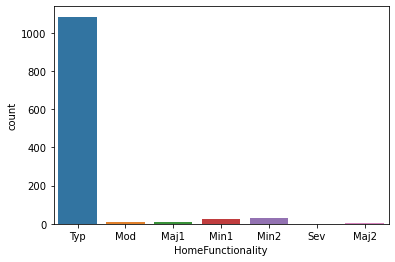

In [154]:
ax=sns.countplot(x='HomeFunctionality',data=df)
print(df['HomeFunctionality'].value_counts())

From the above observation we can see that most houses have Typical Home Functionality(1085), there are no houses with damaged functionality

Gd    852
TA    252
Fa     25
Ex     21
Po     18
Name: FireplaceQu, dtype: int64


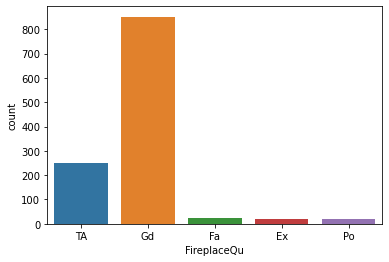

In [155]:
ax=sns.countplot(x='FireplaceQu',data=df)
print(df['FireplaceQu'].value_counts())

From the above observation we can see that most of the houses have Good - Masonry Fireplace in main level(852),some houses have Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement(252), there are no houses with No fireplace or Poor - Ben Franklin Stove

Attchd     755
Detchd     314
BuiltIn     70
Basment     16
CarPort      8
2Types       5
Name: GarageType, dtype: int64


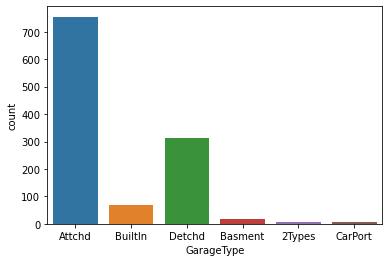

In [156]:
ax=sns.countplot(x='GarageType',data=df)
print(df['GarageType'].value_counts())

From the above observation  we can see that max houses have attached garage to home(755), some houses have detchd garage to home(314), some houses have Built-In (Garage part of house - typically has room above garage)(70)

Unf    551
RFn    339
Fin    278
Name: GarageFinish, dtype: int64


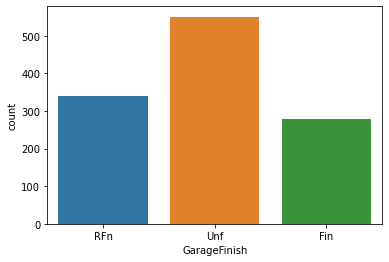

In [157]:
ax=sns.countplot(x='GarageFinish',data=df)
print(df['GarageFinish'].value_counts())

From the above observation we can see that in most of the houses Interior finish of the garage is unfinished(551),some houses have Rough Finished garage(339), and the remaining houses have garage which are Finished(278) 

TA    1114
Fa      39
Gd      11
Ex       2
Po       2
Name: GarageQual, dtype: int64


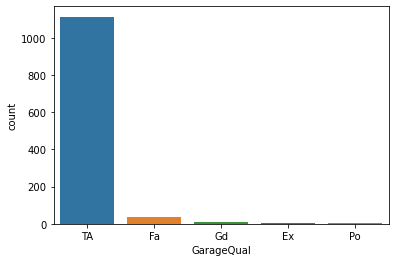

In [158]:
ax=sns.countplot(x='GarageQual',data=df)
print(df['GarageQual'].value_counts())

From the above observation we can see that mostly the houses have garage quality as- Typical/average(1114), very few houses have garage quality as-Fair(39), only 2 houses have poor quality garage, and there are no houses with no garage.

TA    1125
Fa      28
Gd       8
Po       6
Ex       1
Name: GarageCond, dtype: int64


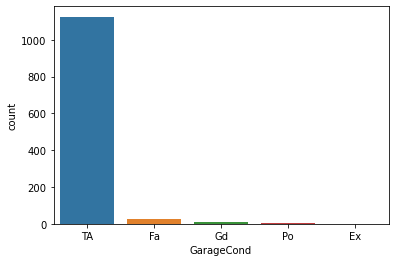

In [159]:
ax=sns.countplot(x='GarageCond',data=df)
print(df['GarageCond'].value_counts())

From the above observation we can see that most of the houses have garage with typical/average condition(1125),some houses have garage with fair condition(28),there are no houses with no garage

Y    1071
N      74
P      23
Name: PavedDrive, dtype: int64


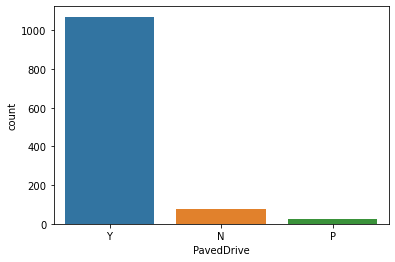

In [160]:
ax=sns.countplot(x='PavedDrive',data=df)
print(df['PavedDrive'].value_counts())

From the above observation we can see that most of the houses have Paved driveway(1071), some houses have Partial Pavement(23), and the remaining houses have Dirt/Gravel(74)

MnPrv    1060
GdPrv      51
GdWo       47
MnWw       10
Name: FenceQlty, dtype: int64


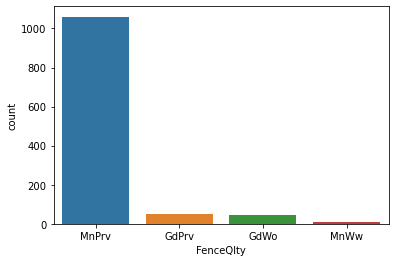

In [161]:
ax=sns.countplot(x='FenceQlty',data=df)
print(df['FenceQlty'].value_counts())

From the above observation we can see that most of the houses have Minimum Wood/Wire--fencequality(1060), some houses have Good Privacy(51), some houses have Good Wood fence quality(47), and the remaining houses have Minimum Wood/Wire(10), there are no houses with no fencing 

WD       999
New      106
COD       38
ConLD      8
ConLI      5
ConLw      4
Oth        3
CWD        3
Con        2
Name: SaleType, dtype: int64


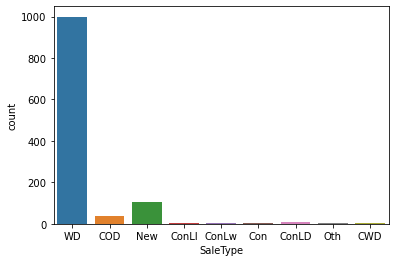

In [162]:
ax=sns.countplot(x='SaleType',data=df)
print(df['SaleType'].value_counts())

From the above observation we can see that most of the houses have Warranty Deed - Conventional type of sale(999), some houses are new--just constructed and sold(106) 

Normal     945
Partial    108
Abnorml     81
Family      18
Alloca      12
AdjLand      4
Name: SaleCondition, dtype: int64


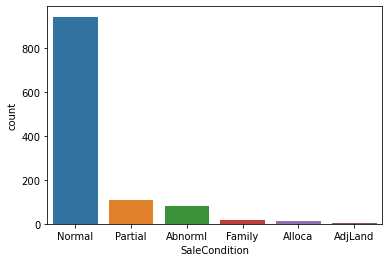

In [163]:
ax=sns.countplot(x='SaleCondition',data=df)
print(df['SaleCondition'].value_counts())

From the above observation we can see that most of the houses have Normal Sale condition(945), few houses have Partial	Home was not completed when last assessed(108), some houses also belong to Abnormal Sale -  trade, foreclosure, short sale(81)

# Checking Correlation

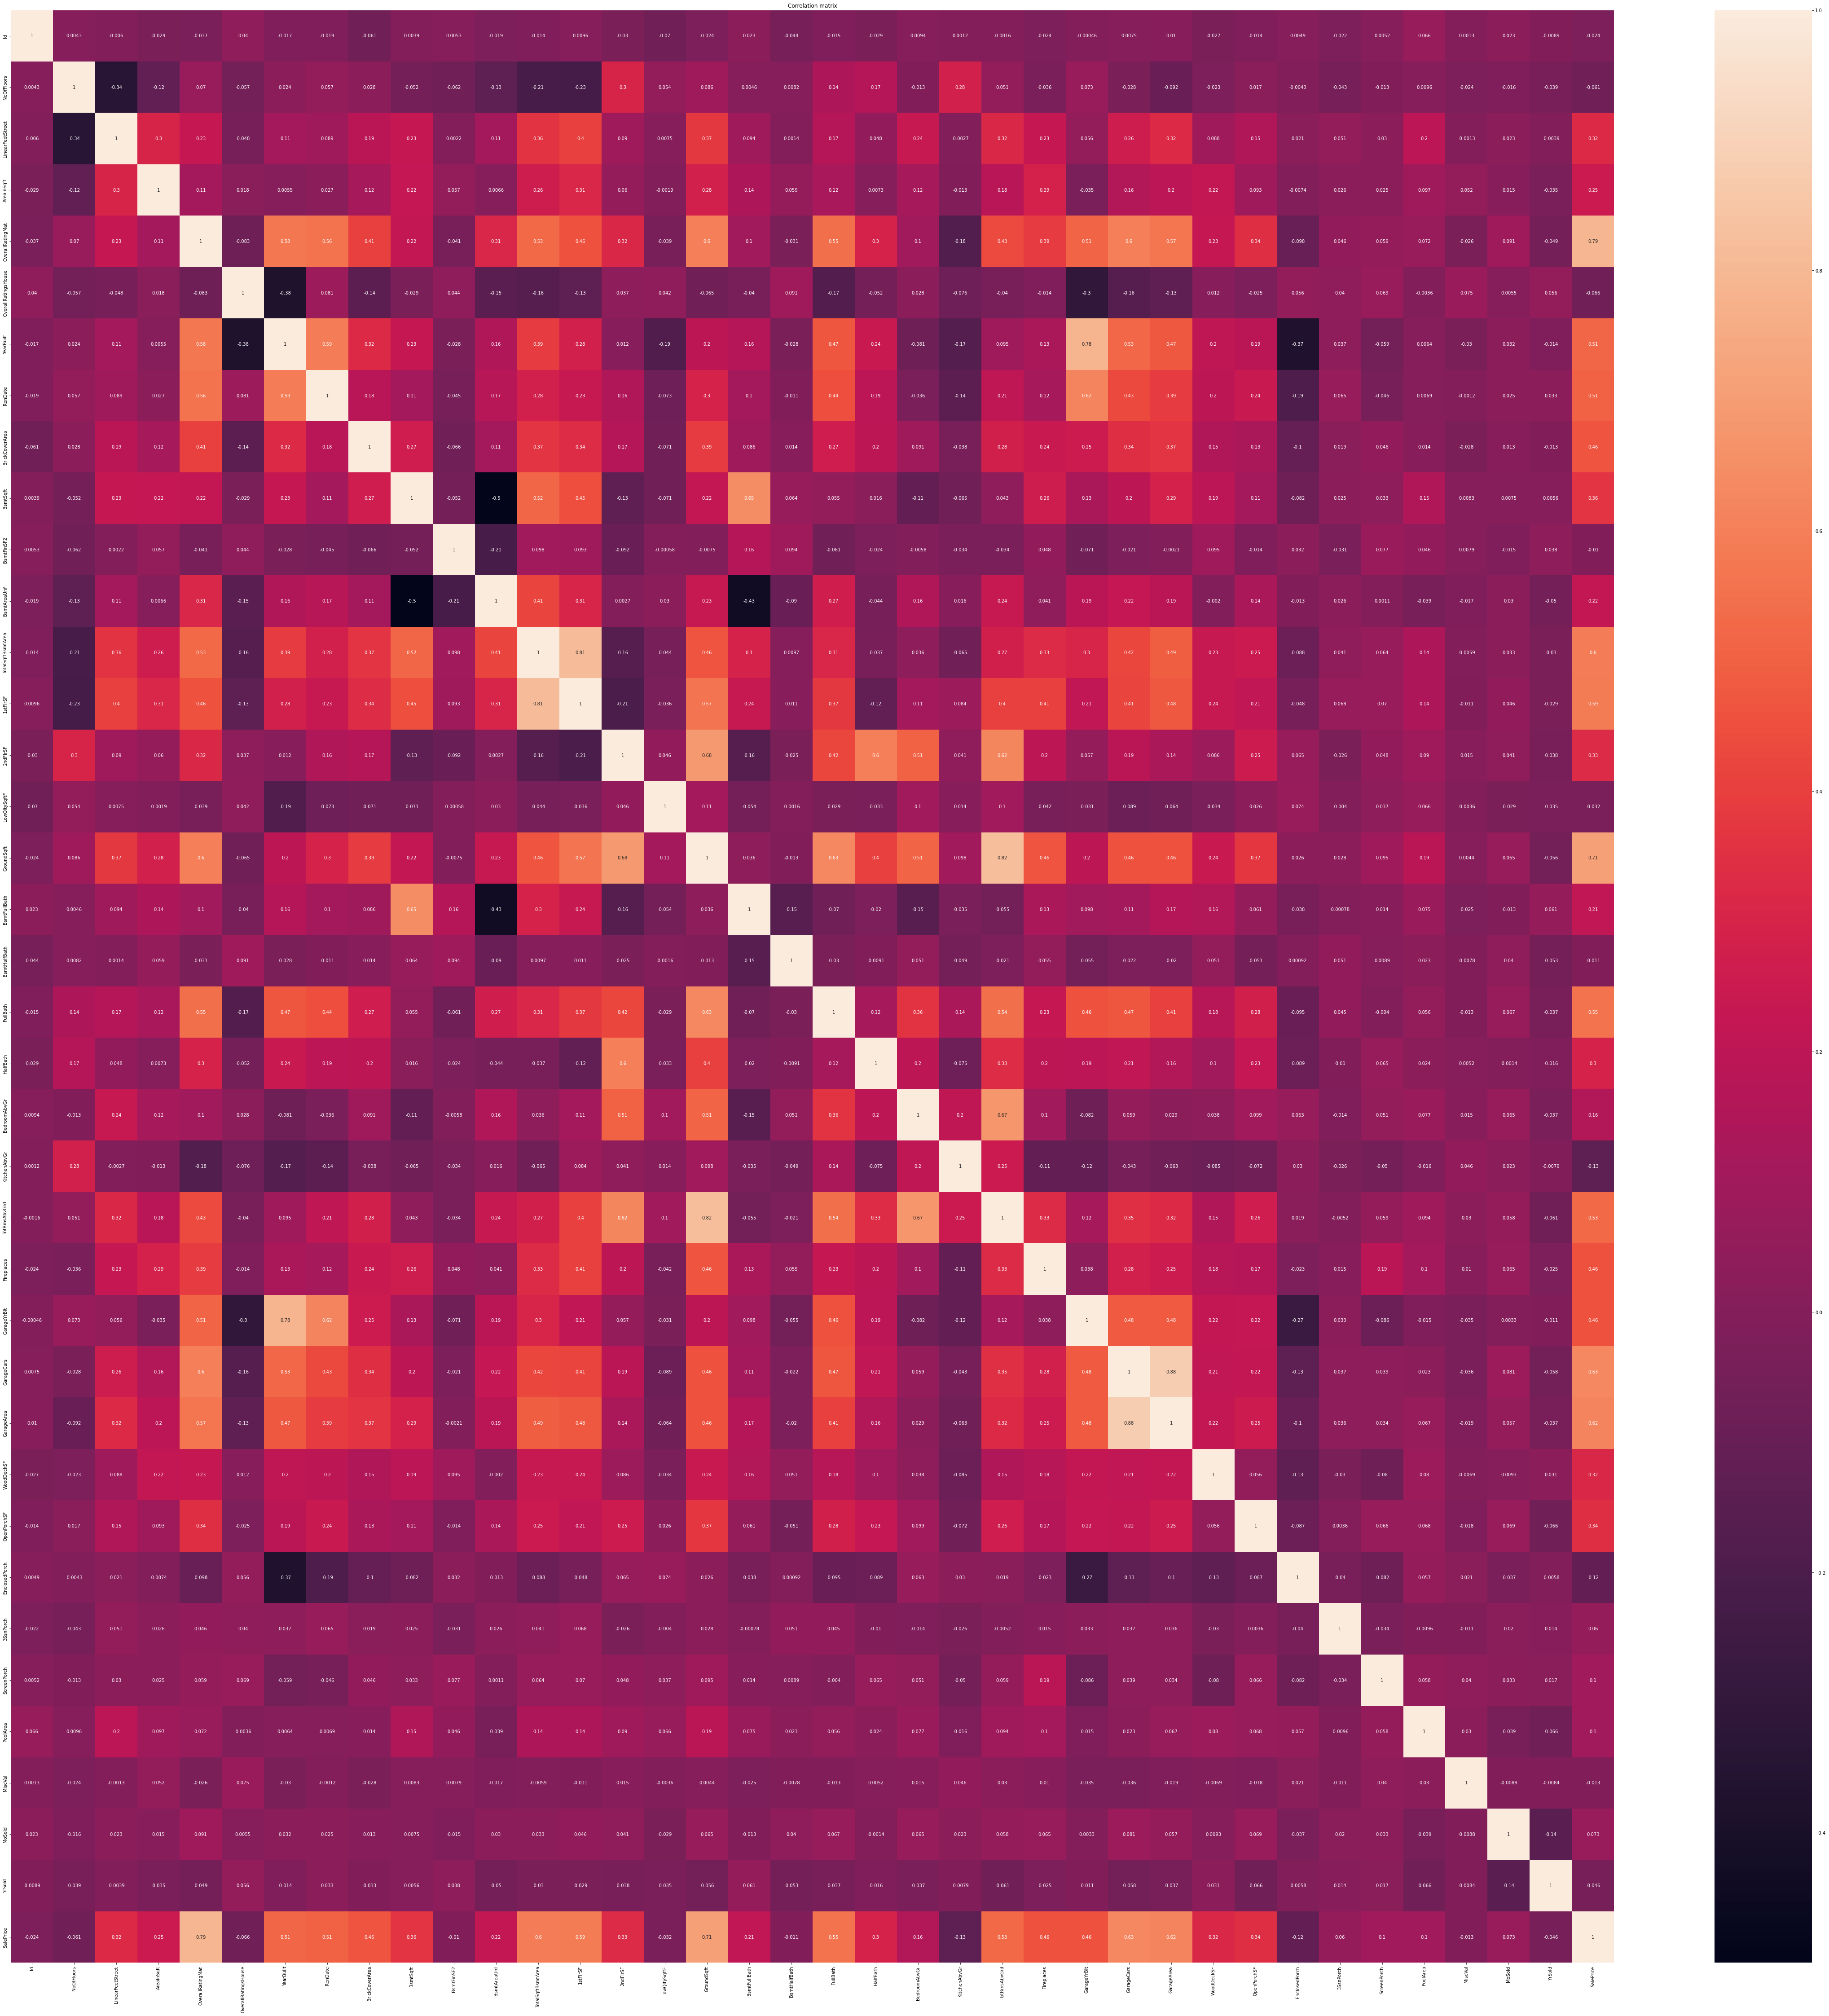

In [164]:
corr_mat=df.corr()
plt.figure(figsize=[80,80])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation matrix")
plt.show()

In [165]:
#We shall check for correlation with target variable
corr_matrix=df.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice              1.000000
OverallRatingMat       0.789185
GroundSqft             0.707300
GarageCars             0.628329
GarageArea             0.619000
TotalSqftBsmtArea      0.595042
1stFlrSF               0.587642
FullBath               0.554988
TotRmsAbvGrd           0.528363
YearBuilt              0.514408
RenDate                0.507831
BrickCoverArea         0.463626
Fireplaces             0.459611
GarageYrBlt            0.458007
BsmtSqft               0.362874
OpenPorchSF            0.339500
2ndFlrSF               0.330386
LinearFeetStreet       0.323779
WoodDeckSF             0.315444
HalfBath               0.295592
AreaInSqft             0.249499
BsmtAreaUnf            0.215724
BsmtFullBath           0.212924
BedroomAbvGr           0.158281
PoolArea               0.103280
ScreenPorch            0.100284
MoSold                 0.072764
3SsnPorch              0.060119
BsmtFinSF2            -0.010151
BsmtHalfBath          -0.011109
MiscVal               -0.013071
Id      

features which affect the price positively or negatively are as follows:
Positive correlation :
OverallRatingMat       0.789185
GroundSqft             0.707300
GarageCars             0.628329
GarageArea             0.619000
TotalSqftBsmtArea      0.595042
1stFlrSF               0.587642
FullBath               0.554988
TotRmsAbvGrd           0.528363
YearBuilt              0.514408
RenDate                0.507831
BrickCoverArea         0.463626
Fireplaces             0.459611
GarageYrBlt            0.458007
BsmtSqft               0.362874
OpenPorchSF            0.339500
2ndFlrSF               0.330386
LinearFeetStreet       0.323779
WoodDeckSF             0.315444
HalfBath               0.295592
AreaInSqft             0.249499
BsmtAreaUnf            0.215724
BsmtFullBath           0.212924
BedroomAbvGr           0.158281
PoolArea               0.103280
ScreenPorch            0.100284
MoSold                 0.072764
3SsnPorch              0.060119
------------------------------Negative Corelations:--------------------------------------------------------
BsmtHalfBath          -0.011109
MiscVal               -0.013071
Id                    -0.023897
LowQltySqftF          -0.032381
YrSold                -0.045508
NoOfFloors            -0.060775
OverallRatingsHouse   -0.065642
EnclosedPorch         -0.115004
KitchenAbvGr          -0.132108 
these have the higher impact in deciding the price of the house
    

From the above observations, we can see that there is no multicolinearity present 

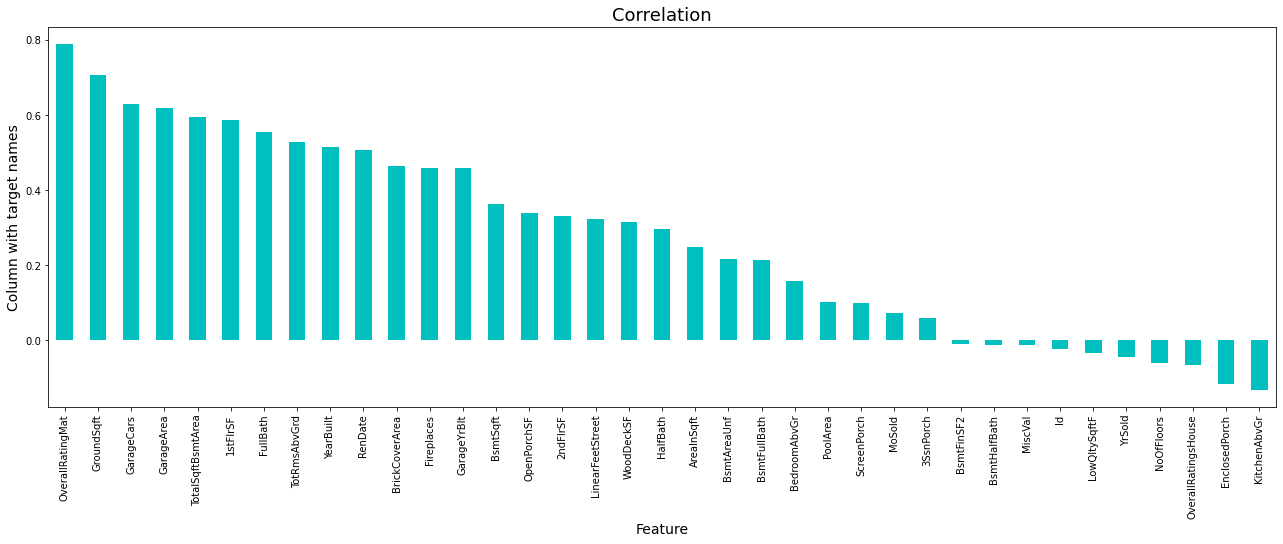

In [166]:
#checking columns which are positively and negatively corelated with target columns:
plt.figure(figsize=(22,7))
df.corr()['SalePrice'].sort_values(ascending=False).drop(['SalePrice']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Column with target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

# Skweness

Should ideally is zero (other than zero value , if present then it means that data is not normally distributed)

In [179]:
#data processing---splitting the independent and target variables in x and y 
x=df.drop('SalePrice',axis=1)
y=df['SalePrice']

In [180]:
x

,Id,NoOfFloors,TypeOfProperty,LinearFeetStreet,AreaInSqft,Street,Alley,PropertyShape,PropertyFlatness,Utilities,...,ScreenPorch,PoolArea,PoolQlty,FenceQlty,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,127,120,3.0,70.98847,4928,1.0,0.0,0.0,3.0,0.0,...,0,0,2.0,2.0,2.0,0,2,2007,8.0,4.0
1,889,20,3.0,95.00000,15865,1.0,0.0,0.0,3.0,0.0,...,224,0,2.0,2.0,2.0,0,10,2007,8.0,4.0
2,793,60,3.0,92.00000,9920,1.0,0.0,0.0,3.0,0.0,...,0,0,2.0,2.0,2.0,0,6,2007,8.0,4.0
3,110,20,3.0,105.00000,11751,1.0,0.0,0.0,3.0,0.0,...,0,0,2.0,2.0,2.0,0,1,2010,0.0,4.0
4,422,20,3.0,70.98847,16635,1.0,0.0,0.0,3.0,0.0,...,0,0,2.0,2.0,2.0,0,6,2009,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,3.0,70.98847,9819,1.0,0.0,0.0,3.0,0.0,...,0,0,2.0,2.0,2.0,0,2,2010,8.0,4.0
1164,554,20,3.0,67.00000,8777,1.0,0.0,3.0,3.0,0.0,...,0,0,2.0,2.0,2.0,0,5,2009,8.0,4.0
1165,196,160,3.0,24.00000,2280,1.0,0.0,3.0,3.0,0.0,...,0,0,2.0,2.0,2.0,0,7,2009,8.0,4.0
1166,31,70,0.0,50.00000,8500,1.0,1.0,3.0,3.0,0.0,...,0,0,2.0,2.0,2.0,0,7,2008,8.0,4.0


In [181]:
y

0       128000
1       268000
2       269790
3       190000
4       215000
         ...  
1163    122000
1164    108000
1165    148500
1166     40000
1167    183200
Name: SalePrice, Length: 1168, dtype: int64

In [182]:
#Encoding of dataframe
df.sample(10) #to convert string/object data to numeric data

,Id,NoOfFloors,TypeOfProperty,LinearFeetStreet,AreaInSqft,Street,Alley,PropertyShape,PropertyFlatness,Utilities,...,PoolArea,PoolQlty,FenceQlty,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
478,1081,20,3.0,80.00000,11040,1.0,0.0,3.0,3.0,0.0,...,0,2.0,2.0,2.0,0,10,2008,0.0,0.0,145000
101,1095,20,3.0,74.00000,5868,1.0,0.0,3.0,3.0,0.0,...,0,2.0,2.0,2.0,0,5,2010,8.0,4.0,129000
955,1392,90,3.0,65.00000,8944,1.0,0.0,3.0,3.0,0.0,...,0,2.0,2.0,2.0,0,4,2009,8.0,4.0,124000
340,267,60,3.0,70.00000,11207,1.0,0.0,0.0,1.0,0.0,...,0,2.0,2.0,2.0,0,6,2006,8.0,4.0,185000
137,393,20,3.0,70.98847,8339,1.0,0.0,0.0,3.0,0.0,...,0,2.0,2.0,2.0,1200,7,2007,8.0,4.0,106500
655,1138,50,3.0,54.00000,6342,1.0,0.0,3.0,3.0,0.0,...,0,2.0,2.0,2.0,0,5,2010,8.0,4.0,94000
1007,1286,50,4.0,50.00000,6000,1.0,0.0,3.0,3.0,0.0,...,0,2.0,2.0,2.0,0,5,2009,8.0,4.0,132500
153,1436,20,3.0,80.00000,8400,1.0,0.0,3.0,3.0,0.0,...,0,2.0,0.0,2.0,0,7,2008,0.0,0.0,174000
69,231,20,3.0,73.00000,8760,1.0,0.0,3.0,3.0,0.0,...,0,2.0,2.0,2.0,0,4,2010,8.0,4.0,148000
444,239,20,3.0,93.00000,12030,1.0,0.0,3.0,3.0,0.0,...,0,2.0,2.0,2.0,0,12,2007,6.0,5.0,318000


In [183]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))


In [184]:
df

,Id,NoOfFloors,TypeOfProperty,LinearFeetStreet,AreaInSqft,Street,Alley,PropertyShape,PropertyFlatness,Utilities,...,PoolArea,PoolQlty,FenceQlty,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,3.0,70.98847,4928,1.0,0.0,0.0,3.0,0.0,...,0,2.0,2.0,2.0,0,2,2007,8.0,4.0,128000
1,889,20,3.0,95.00000,15865,1.0,0.0,0.0,3.0,0.0,...,0,2.0,2.0,2.0,0,10,2007,8.0,4.0,268000
2,793,60,3.0,92.00000,9920,1.0,0.0,0.0,3.0,0.0,...,0,2.0,2.0,2.0,0,6,2007,8.0,4.0,269790
3,110,20,3.0,105.00000,11751,1.0,0.0,0.0,3.0,0.0,...,0,2.0,2.0,2.0,0,1,2010,0.0,4.0,190000
4,422,20,3.0,70.98847,16635,1.0,0.0,0.0,3.0,0.0,...,0,2.0,2.0,2.0,0,6,2009,8.0,4.0,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,3.0,70.98847,9819,1.0,0.0,0.0,3.0,0.0,...,0,2.0,2.0,2.0,0,2,2010,8.0,4.0,122000
1164,554,20,3.0,67.00000,8777,1.0,0.0,3.0,3.0,0.0,...,0,2.0,2.0,2.0,0,5,2009,8.0,4.0,108000
1165,196,160,3.0,24.00000,2280,1.0,0.0,3.0,3.0,0.0,...,0,2.0,2.0,2.0,0,7,2009,8.0,4.0,148500
1166,31,70,0.0,50.00000,8500,1.0,1.0,3.0,3.0,0.0,...,0,2.0,2.0,2.0,0,7,2008,8.0,4.0,40000


In [185]:
#checking the skewness only for feature columns
import warnings
warnings.filterwarnings('ignore')
x.skew().sort_values(ascending=False)

MiscVal                23.065943
PoolArea               13.243711
Condition2             11.514458
AreaInSqft             10.659285
Heating                10.103609
3SsnPorch               9.770611
LowQltySqftF            8.666142
RoofMatl                7.577352
Alley                   5.436187
LandSlope               4.812568
BsmtFinSF2              4.365829
KitchenAbvGr            4.365259
BsmtHalfBath            4.264403
ScreenPorch             4.105741
EnclosedPorch           3.043610
Condition1              3.008289
BrickCoverArea          2.834658
LinearFeetStreet        2.710383
OpenPorchSF             2.410840
BldgType                2.318657
BsmtSqft                1.871606
TotalSqftBsmtArea       1.744591
1stFlrSF                1.513707
WoodDeckSF              1.504929
RoofStyle               1.498560
GroundSqft              1.449952
NoOfFloors              1.422019
BsmtAreaUnf             0.909057
GarageType              0.831142
2ndFlrSF                0.823479
FireplaceQ

As we can see skewness in most of the columns , we will remove the skewness by using power_transform() and try to bring it as close to 1

In [186]:
from sklearn.preprocessing import power_transform,PowerTransformer
x_new=power_transform(x)
x_new

array([[-1.54496771,  1.37043472, -0.16245555, ..., -0.60480623,
         0.40906852,  0.02973497],
       [ 0.46194084, -1.16799937, -0.16245555, ..., -0.60480623,
         0.40906852,  0.02973497],
       [ 0.25422089,  0.4900471 , -0.16245555, ..., -0.60480623,
         0.40906852,  0.02973497],
       ...,
       [-1.30033656,  1.70079775, -0.16245555, ...,  0.89957552,
         0.40906852,  0.02973497],
       [-1.97567978,  0.69655685, -2.92646435, ...,  0.14807039,
         0.40906852,  0.02973497],
       [-0.14748082,  0.4900471 , -0.16245555, ..., -1.3590026 ,
         0.40906852,  0.02973497]])

In [187]:
#Recheck the skewness , after transformation:
pd.DataFrame(x_new,columns=x.columns).skew().sort_values(ascending=False)

PoolArea               12.817372
MiscFeature             9.291637
3SsnPorch               7.087955
LowQltySqftF            6.922843
Alley                   5.436187
MiscVal                 4.991071
LandSlope               3.954345
BsmtHalfBath            3.954345
ScreenPorch             3.067153
BsmtFinSF2              2.394737
EnclosedPorch           2.022616
BldgType                1.857194
FenceQlty               1.116688
Condition2              0.537277
HalfBath                0.498003
BrickCoverArea          0.416370
BsmtFullBath            0.365488
TotalSqftBsmtArea       0.286779
2ndFlrSF                0.280208
TypeOfProperty          0.233113
Condition1              0.225468
GarageType              0.222501
LinearFeetStreet        0.161368
Heating_qlty_cond       0.156511
BedroomAbvGr            0.116498
WoodDeckSF              0.113026
YrSold                  0.112893
Fireplaces              0.084950
FireplaceQu             0.082653
NoOfFloors              0.064007
OverallRat

From the above observation we can see that, the skewness still needs to be reduced.

In [189]:
#Drop the columns, which are highly skewed
df.drop(['PoolArea','Street','PoolQlty','MiscFeature','3SsnPorch','LowQltySqftF'],axis=1,inplace=True)

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 75 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   1168 non-null   int64  
 1   NoOfFloors           1168 non-null   int64  
 2   TypeOfProperty       1168 non-null   float64
 3   LinearFeetStreet     1168 non-null   float64
 4   AreaInSqft           1168 non-null   int64  
 5   Alley                1168 non-null   float64
 6   PropertyShape        1168 non-null   float64
 7   PropertyFlatness     1168 non-null   float64
 8   Utilities            1168 non-null   float64
 9   PropertyConfig       1168 non-null   float64
 10  LandSlope            1168 non-null   float64
 11  Neighborhood         1168 non-null   float64
 12  Condition1           1168 non-null   float64
 13  Condition2           1168 non-null   float64
 14  BldgType             1168 non-null   float64
 15  NoOfFLoorsFUF        1168 non-null   f

In [191]:
df.shape

(1168, 75)

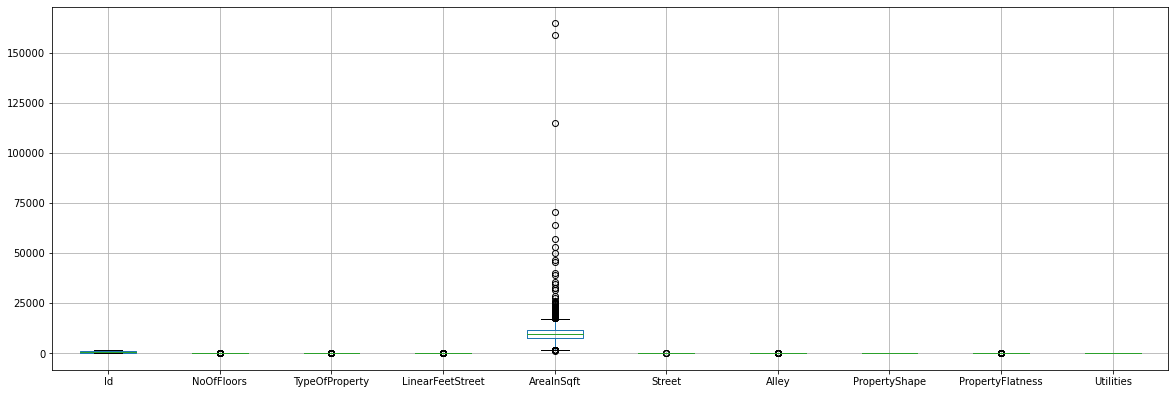

In [192]:
#Checking for outliers:
#plotting boxplots for first 10 columns
x.iloc[:,0:10].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

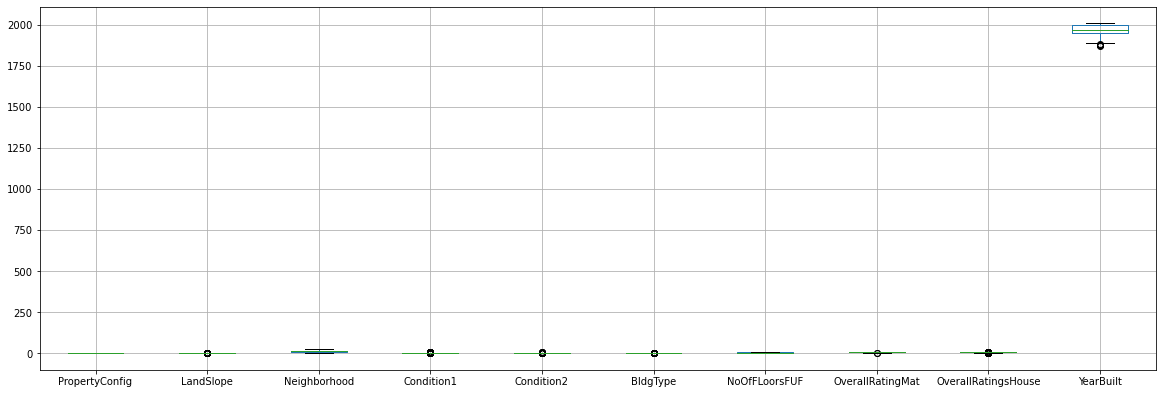

In [193]:
#plotting boxplots for next 10 columns
x.iloc[:,10:20].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

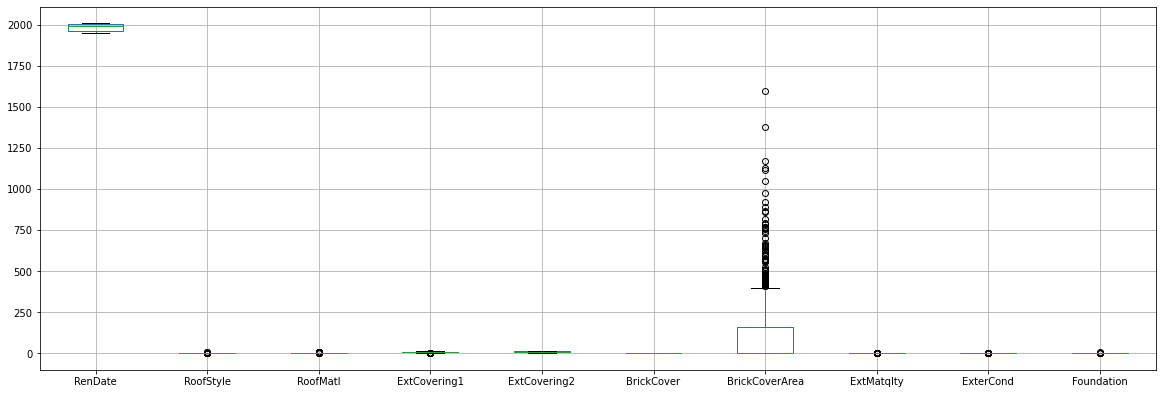

In [194]:
#plotting boxplots for next 10 columns
x.iloc[:,20:30].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

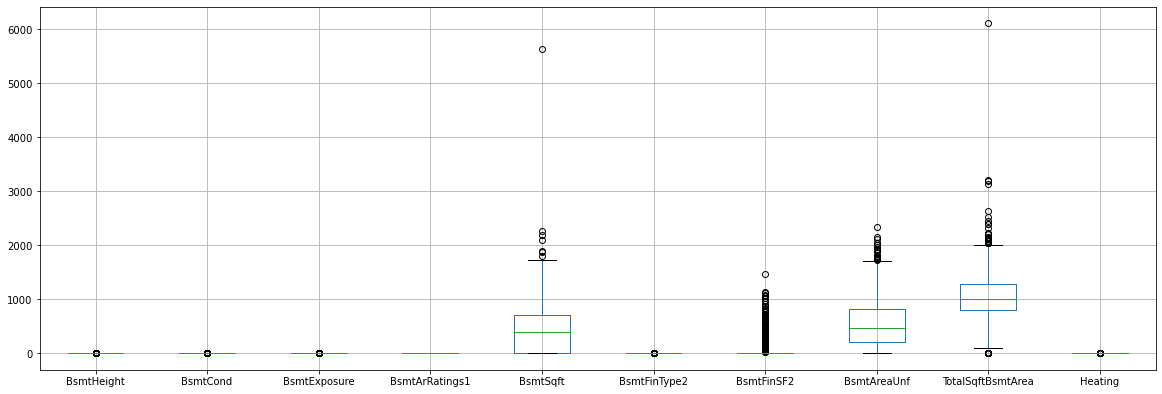

In [195]:
#plotting boxplots for next 10 columns
x.iloc[:,30:40].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

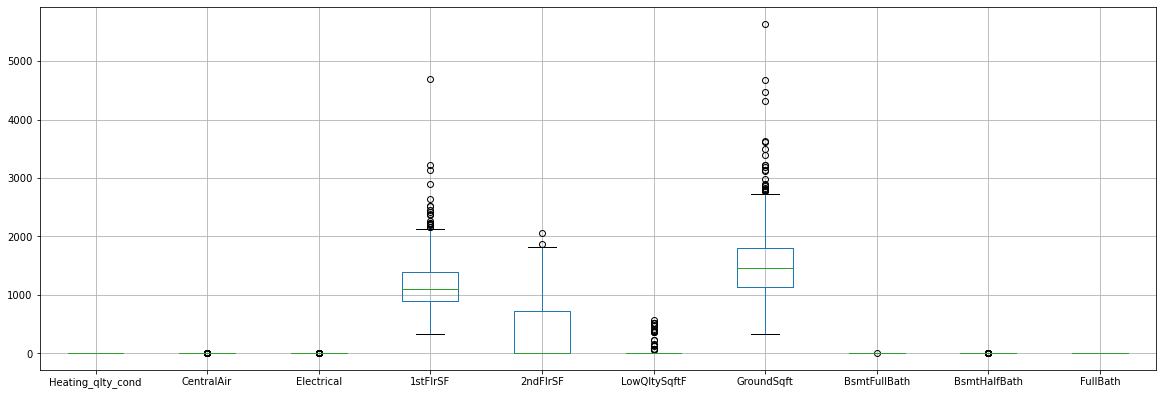

In [196]:
#plotting boxplots for next 10 columns
x.iloc[:,40:50].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

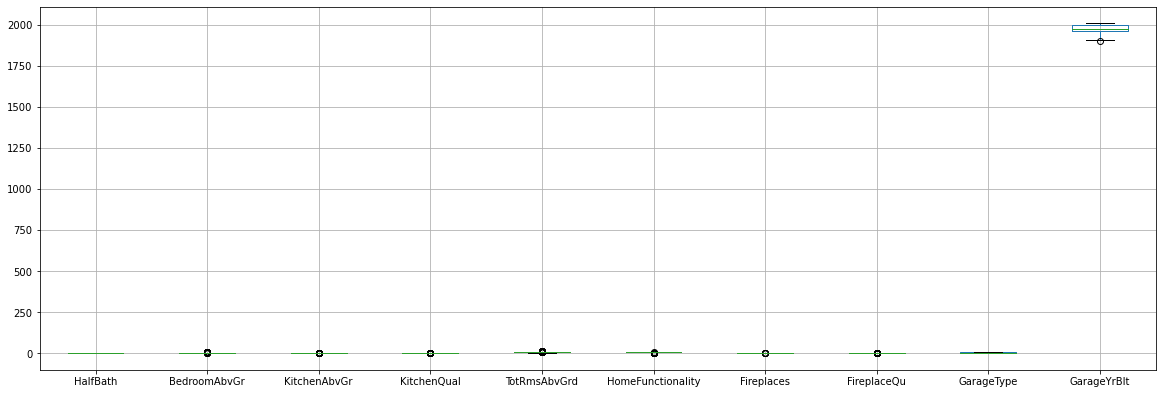

In [197]:
#plotting boxplots for next 10 columns
x.iloc[:,50:60].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

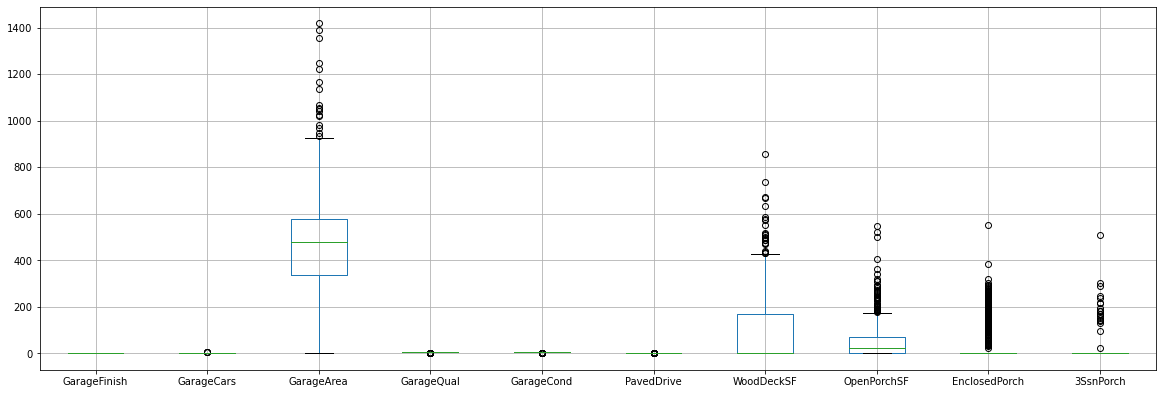

In [198]:
#plotting boxplots for next 10 columns
x.iloc[:,60:70].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

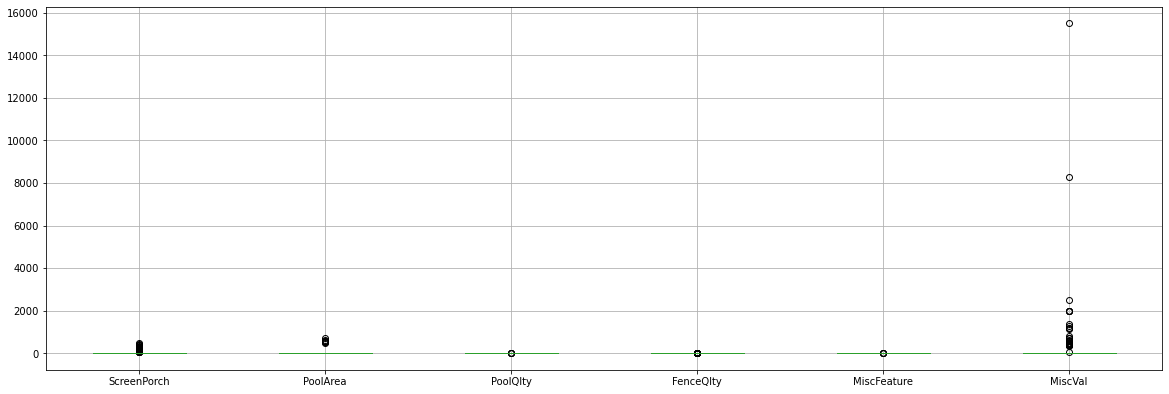

In [199]:
#plotting boxplots for next 10 columns
x.iloc[:,70:76].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [201]:
from scipy.stats import zscore
(np.abs(zscore(x))).all().all()

False

In [202]:
(np.abs(zscore(x))<3).all().all()

False

It means outliers are present

In [203]:
#removal of outliers---using zscore
df.shape

(1168, 75)

In [205]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([   1,    1,    1, ..., 1166, 1166, 1166], dtype=int64),
 array([10, 21, 35, ..., 40, 62, 63], dtype=int64))

In [208]:
df.shape

(1168, 75)

In [280]:
df.sample(5)

,Id,NoOfFloors,TypeOfProperty,LinearFeetStreet,AreaInSqft,Alley,PropertyShape,PropertyFlatness,Utilities,PropertyConfig,...,OpenPorchSF,EnclosedPorch,ScreenPorch,FenceQlty,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
629,1427,60,3.0,81.0,10944,0.0,0.0,3.0,0.0,4.0,...,132,0,0,2.0,0,8,2008,8.0,4.0,271000
75,479,20,3.0,79.0,10637,0.0,3.0,3.0,0.0,4.0,...,44,0,0,2.0,0,9,2009,8.0,4.0,297000
831,615,180,4.0,21.0,1491,0.0,3.0,3.0,0.0,4.0,...,24,0,0,2.0,0,5,2010,8.0,4.0,75500
28,556,45,4.0,58.0,6380,0.0,3.0,3.0,0.0,4.0,...,0,116,0,2.0,0,8,2006,8.0,4.0,113000
648,1356,80,3.0,102.0,10192,0.0,0.0,3.0,0.0,4.0,...,98,0,0,0.0,0,9,2006,8.0,4.0,170000


In [282]:
x1=df.drop('SalePrice',axis=1)
y1=df['SalePrice']

In [283]:
x1.shape

(1168, 74)

In [284]:
y1

0       128000
1       268000
2       269790
3       190000
4       215000
         ...  
1163    122000
1164    108000
1165    148500
1166     40000
1167    183200
Name: SalePrice, Length: 1168, dtype: int64

In [285]:
#scaling the data using min-max scaler
from sklearn.preprocessing import MinMaxScaler
mns=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At randomstate{i},the training accuracy is:-{r2_score(y_train,pred_train)}")
    print(f"At randomstate{i},the testing accuracy is:-{r2_score(y_test,pred_test)}")
    print("\n")


At randomstate0,the training accuracy is:-0.8306459181258781
At randomstate0,the testing accuracy is:-0.8266638317702593


At randomstate1,the training accuracy is:-0.8351190718639524
At randomstate1,the testing accuracy is:-0.8192153129762665


At randomstate2,the training accuracy is:-0.8384544097834822
At randomstate2,the testing accuracy is:-0.794819078258226


At randomstate3,the training accuracy is:-0.8257233986608008
At randomstate3,the testing accuracy is:-0.8661224258358151


At randomstate4,the training accuracy is:-0.867162944566834
At randomstate4,the testing accuracy is:-0.600566571519154


At randomstate5,the training accuracy is:-0.8678148733832276
At randomstate5,the testing accuracy is:-0.6302910271710598


At randomstate6,the training accuracy is:-0.8311778076006592
At randomstate6,the testing accuracy is:-0.8449966797207054


At randomstate7,the training accuracy is:-0.8428759058127604
At randomstate7,the testing accuracy is:-0.7820959665539391


At randomstate8,the

In [303]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.3,random_state=48)
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
print(r2_score(y_test,pred_test))

0.8528141394765885


approx: 86%

In [304]:
x_train.shape

(817, 74)

In [305]:
x_test.shape

(351, 74)

In [307]:
y_train.shape

(817,)

In [308]:
y_test.shape

(351,)

# Make the prediction on test data

In [233]:
df1=pd.read_csv("test.csv")
df1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
289,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal


In [234]:
df1.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
19,173,160,RL,44.0,5306,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
37,1292,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
146,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml
86,1433,30,RL,60.0,10800,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
27,369,20,RL,78.0,7800,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,Normal
234,354,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
56,443,50,RM,52.0,6240,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal
85,1032,75,RL,102.0,15863,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal
244,486,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
106,47,50,RL,48.0,12822,Pave,NaN,IR1,Lvl,AllPub,...,198,0,NaN,NaN,NaN,0,8,2009,WD,Abnorml


In [235]:
pd.set_option('display.max_rows',81)

In [236]:
df1.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [237]:
#Rename the columns for better understanding
df1.rename(columns = {'MSSubClass':'NoOfFloors','MSZoning':'TypeOfProperty','LotFrontage':'LinearFeetStreet','LotArea':'AreaInSqft','LotShape':'PropertyShape','LandContour':'PropertyFlatness','LotConfig':'PropertyConfig','HouseStyle':'NoOfFLoorsFUF','OverallQual':'OverallRatingMat','OverallCond':'OverallRatingsHouse','YearRemodAdd':'RenDate','Exterior1st':'ExtCovering1','Exterior2nd':'ExtCovering2','MasVnrType':'BrickCover','MasVnrArea':'BrickCoverArea','ExterQual':'ExtMatqlty','BsmtQual':'BsmtHeight','BsmtFinType1':'BsmtArRatings1','BsmtFinSF1':'BsmtSqft','BsmtUnfSF':'BsmtAreaUnf','TotalBsmtSF':'TotalSqftBsmtArea','HeatingQC':'Heating_qlty_cond','LowQualFinSF':'LowQltySqftF','GrLivArea':'GroundSqft','Functional':'HomeFunctionality','PoolQC':'PoolQlty','Fence':'FenceQlty'},inplace=True)

In [238]:
df1

,Id,NoOfFloors,TypeOfProperty,LinearFeetStreet,AreaInSqft,Street,Alley,PropertyShape,PropertyFlatness,Utilities,...,ScreenPorch,PoolArea,PoolQlty,FenceQlty,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
289,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal


In [230]:
df1.isnull().sum()

Id                       0
NoOfFloors               0
TypeOfProperty           0
LinearFeetStreet        45
AreaInSqft               0
Street                   0
Alley                  278
PropertyShape            0
PropertyFlatness         0
Utilities                0
PropertyConfig           0
LandSlope                0
Neighborhood             0
Condition1               0
Condition2               0
BldgType                 0
NoOfFLoorsFUF            0
OverallRatingMat         0
OverallRatingsHouse      0
YearBuilt                0
RenDate                  0
RoofStyle                0
RoofMatl                 0
ExtCovering1             0
ExtCovering2             0
BrickCover               1
BrickCoverArea           1
ExtMatqlty               0
ExterCond                0
Foundation               0
BsmtHeight               7
BsmtCond                 7
BsmtExposure             7
BsmtArRatings1           7
BsmtSqft                 0
BsmtFinType2             7
BsmtFinSF2               0
B

In [231]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   292 non-null    int64  
 1   NoOfFloors           292 non-null    int64  
 2   TypeOfProperty       292 non-null    object 
 3   LinearFeetStreet     247 non-null    float64
 4   AreaInSqft           292 non-null    int64  
 5   Street               292 non-null    object 
 6   Alley                14 non-null     object 
 7   PropertyShape        292 non-null    object 
 8   PropertyFlatness     292 non-null    object 
 9   Utilities            292 non-null    object 
 10  PropertyConfig       292 non-null    object 
 11  LandSlope            292 non-null    object 
 12  Neighborhood         292 non-null    object 
 13  Condition1           292 non-null    object 
 14  Condition2           292 non-null    object 
 15  BldgType             292 non-null    obj

In [239]:
#Drop the columns, which are highly skewed
df1.drop(['PoolArea','Street','PoolQlty','MiscFeature','3SsnPorch','LowQltySqftF'],axis=1,inplace=True)

In [240]:
df1.shape

(292, 74)

In [241]:
#Handling the null values
df1['LinearFeetStreet'].mean()

66.4251012145749

In [242]:
df1['LinearFeetStreet']=df1['LinearFeetStreet'].fillna(np.mean(df1['LinearFeetStreet']))

In [243]:
df1['BrickCover'].mode()

0    None
Name: BrickCover, dtype: object

In [244]:
df1['BrickCover'].fillna('None',inplace=True)

In [245]:
df1['BrickCoverArea']=df1['BrickCoverArea'].fillna(np.mean(df1['BrickCoverArea']))

In [246]:
df1['BsmtHeight'].mode()

0    TA
Name: BsmtHeight, dtype: object

In [247]:
df1['BsmtHeight'].fillna('TA',inplace=True)

In [248]:
df1['BsmtCond'].mode()

0    TA
Name: BsmtCond, dtype: object

In [249]:
df1['BsmtCond'].fillna('TA',inplace=True)

In [250]:
df1['BsmtExposure'].mode()

0    No
Name: BsmtExposure, dtype: object

In [251]:
df1['BsmtExposure'].fillna('No',inplace=True)

In [252]:
df1['BsmtArRatings1'].mode()

0    GLQ
Name: BsmtArRatings1, dtype: object

In [253]:
df1['BsmtArRatings1'].fillna('GLQ',inplace=True)

In [254]:
df1['BsmtFinType2'].mode()

0    Unf
Name: BsmtFinType2, dtype: object

In [255]:
df1['BsmtFinType2'].fillna('Unf',inplace=True)

In [256]:
df1['Electrical'].mode()

0    SBrkr
Name: Electrical, dtype: object

In [257]:
df1['Electrical'].fillna('SBrkr',inplace=True)

In [258]:
df1['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

In [259]:
df1['FireplaceQu'].fillna('Gd',inplace=True)

In [260]:
df1['GarageType'].mode()

0    Attchd
Name: GarageType, dtype: object

In [261]:
df1['GarageType'].fillna('Attchd',inplace=True)

In [262]:
df1['GarageYrBlt']=df1['GarageYrBlt'].fillna(np.mean(df1['GarageYrBlt']))

In [263]:
df1['GarageFinish'].mode()

0    Unf
Name: GarageFinish, dtype: object

In [264]:
 df1['GarageFinish'].fillna('Unf',inplace=True)

In [265]:
df1['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

In [266]:
 df1['GarageQual'].fillna('TA',inplace=True)

In [267]:
df1['GarageCond'].mode()

0    TA
Name: GarageCond, dtype: object

In [268]:
 df1['GarageCond'].fillna('TA',inplace=True)

In [269]:
df1['FenceQlty'].mode()

0    MnPrv
Name: FenceQlty, dtype: object

In [270]:
df1['FenceQlty'].fillna('MnPrv',inplace=True)

In [271]:
df1['Alley'].mode()

0    Grvl
Name: Alley, dtype: object

In [272]:
df1['Alley'].fillna('Grvl',inplace=True)

In [275]:
df1.isnull().sum()

Id                     0
NoOfFloors             0
TypeOfProperty         0
LinearFeetStreet       0
AreaInSqft             0
Alley                  0
PropertyShape          0
PropertyFlatness       0
Utilities              0
PropertyConfig         0
LandSlope              0
Neighborhood           0
Condition1             0
Condition2             0
BldgType               0
NoOfFLoorsFUF          0
OverallRatingMat       0
OverallRatingsHouse    0
YearBuilt              0
RenDate                0
RoofStyle              0
RoofMatl               0
ExtCovering1           0
ExtCovering2           0
BrickCover             0
BrickCoverArea         0
ExtMatqlty             0
ExterCond              0
Foundation             0
BsmtHeight             0
BsmtCond               0
BsmtExposure           0
BsmtArRatings1         0
BsmtSqft               0
BsmtFinType2           0
BsmtFinSF2             0
BsmtAreaUnf            0
TotalSqftBsmtArea      0
Heating                0
Heating_qlty_cond      0


In [276]:
#Encoding of dataframe-------------------------------------------
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
for i in df1.columns:
    if df1[i].dtypes=="object":
        df1[i]=enc.fit_transform(df1[i].values.reshape(-1,1))


In [277]:
df1

,Id,NoOfFloors,TypeOfProperty,LinearFeetStreet,AreaInSqft,Alley,PropertyShape,PropertyFlatness,Utilities,PropertyConfig,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,FenceQlty,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,2.0,86.000000,14157,0.0,0.0,1.0,0.0,0.0,...,178,51,0,0,2.0,0,7,2007,5.0,2.0
1,1018,120,2.0,66.425101,5814,0.0,0.0,3.0,0.0,1.0,...,63,0,0,0,2.0,0,8,2009,0.0,0.0
2,929,20,2.0,66.425101,11838,0.0,3.0,3.0,0.0,4.0,...,202,151,0,0,2.0,0,6,2009,5.0,2.0
3,1148,70,2.0,75.000000,12000,0.0,3.0,0.0,0.0,4.0,...,0,0,0,0,2.0,0,7,2009,5.0,2.0
4,1227,60,2.0,86.000000,14598,0.0,0.0,3.0,0.0,1.0,...,100,18,0,0,2.0,0,1,2008,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,2.0,78.000000,10206,0.0,3.0,3.0,0.0,4.0,...,144,99,0,0,2.0,0,10,2008,5.0,2.0
288,1048,20,2.0,57.000000,9245,0.0,1.0,3.0,0.0,4.0,...,0,0,0,0,2.0,0,2,2008,5.0,2.0
289,17,20,2.0,66.425101,11241,0.0,0.0,3.0,0.0,1.0,...,0,0,0,0,2.0,700,3,2010,5.0,2.0
290,523,50,3.0,50.000000,5000,0.0,3.0,3.0,0.0,0.0,...,0,24,36,0,2.0,0,10,2006,5.0,2.0


In [316]:
df1.shape

(292, 74)

In [320]:
#Now predict the result with test data given :
ans=lr.predict(df1)
ans

array([339253.58245944, 230640.39904397, 269113.35918402, 158820.87011858,
       248250.77948079,  86320.23978368, 129378.31288732, 315975.62116269,
       237992.25515356, 193537.40829228,  76431.35348404, 155803.58570142,
       119812.89766385, 211581.76012373, 297942.87911271, 138233.80107361,
       118387.18179148, 131593.11048513, 214179.60002325, 234000.10918846,
       193438.01534008, 166257.9309575 , 150014.27673055,  79006.07750647,
        98096.0723881 , 144879.33202327, 182726.39440052, 140218.87844383,
       175240.54390038,  73451.51806045, 160917.64948995, 218238.72400482,
       252284.79348815, 199612.39137144, 118789.18879019, 183927.34045362,
       218207.16019876, 124148.66413443, 159806.47297273, 150406.87427605,
       103991.00399195, 307410.79525265, 236674.4029021 , 213933.47687275,
       146169.2224375 , 144159.74680879, 124958.20167617, 115936.58774527,
       221492.77276853, 361523.88553614, 138083.93524703, 223342.55190251,
       106592.25897265,  

In [324]:
Final_result_pred=pd.DataFrame()
Final_result_pred['ID']=df1['Id']
Final_result_pred['SalePrice']=ans

In [325]:
Final_result_pred

,ID,SalePrice
0,337,339253.582459
1,1018,230640.399044
2,929,269113.359184
3,1148,158820.870119
4,1227,248250.779481
...,...,...
287,83,261759.164024
288,1048,141088.700667
289,17,172003.963514
290,523,209034.483827


In [326]:
df=pd.DataFrame(Final_result_pred)
df.to_csv('houseprice_submit.csv')